# 1. Introdução

&emsp; Sabe-se que League Of Legends é um dos jogos mais jogados da era. Conhecidissimo pelo seu cenario competitivo, seus personagens carismaticos, jogabilidade marcante e seu público altamente variado, esse jogo vem conquistando adultos e crianças pelo mundo. Com mais de 10 anos de jogo diversas atualizações foram incoporadas, mas nunca alteraram sua jogabilidade, o que torna-o um jogo unico, completo de complexas estrategia.
&emsp; Com o intuito de entender as peculiariades do ambiente profissional que, por conseguinte, interfere no ambiente casual do jogo, conseguimos compreender as formas que os jogadores se comportam, como estrategias são tomadas e o que fazer em cada momento do jogo.

## 1.1 Objetivo Geral:
- Entender a dinamica geral das partidas de league of legend.

### 1.1.1 Objetivo Especifico:
- Compreender o ambiente profissional, assim como as decisões tomadas em jogo;
- Traçar estrategias que colaboram com a vitoria do time;
- Entender variaveis no jogo que possam interferir diretamente na jogabilidade e na vitoria;
- Compreender o comportamento dos jogos da temporada, observando a frequencia e os resultados dos jogos do espaço amostral.

### 1.1.2 Perguntas a serem respondidas:
. Que temporada teve mais jogos? 
. Que time mais participou?
. Que time mais ganhou?
. Que campeões são os mais escolhidos?
. Que campeões são os mais banidos?
. Como ficou a presença de mapa dos times pelo tempo?
. Quando e quais objetivos fazer?
. Ouro garante a vitoria?

<hr>

### 1.1.3 Bibliotecas utilizadas:
&emsp; As bibliotecas utilizadas estão contidas no arquivo `requirements.txt` no diretorio do presente trabalho.

>pip install -r requirements.txt


# 2. Desenvolvimento

## 2.1 Importando Bibliotecas

In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from collections import Counter
from sklearn.cluster import KMeans
sns.set_theme(style = "ticks", rc = {"axes.spines.right": False, "axes.spines.top": False})

# 2.2 Dicionario de Termos:
- Campeão: Personagem utilizado pelo jogador, pode ser dividido em 6 grupos:
    - Assasino (_Assassin_): Campeões de alto dano e pouca vida, são responsaveis por relizar abatimentos rapidos e de forma individual. Normalmente, em combates em grupo, o assasino tenta chegar pela back-line(personagens que lutam a distancia) e assasinar os inimigos com pouca vida;

    - Lutador (_Fighters_): Campeões que lutam corpo-a-corpo, alguns possuem muita vida ou resistencia, mas pouca mobilidade. Esses campeões ajudam a criar aberturas em combates e lutar contra grupos de inimigos;

    - Tanque (_Tank_): Campeões altamente resistentes e com bastante vidas. Esses campeões garatem que pouco dano seja levado pelos campeões aliados. Sua função é unica e exclusivamente resistir dano para seus aliados na front-line(linha de frente);

    - Mago (_Mage_): Campeões com alto pode de habilidade. Magos são campeões que normalmente ficam na back-line causando dano em inimigos e/ou debilitando movimentos;

    - Atirador (_ADC_): Campeões atiradores são campẽoes que usam seus ataques basicos (que não gastam mana) para realizar abatas. Localizado na back-line em confrotos de grupo, o atirador é responsavel por aflingir alto dano a inimigos de forma rapida ou constante;

    - Suporte (_Support_): Campeões que auxiliam outros no jogo. Esses campões são um dos mais importantes em jogo, eles garantem visão de mapa, controle de grupo, cura, criação de momentos para abates. Eles tentam auxiliar o máximo de aliados possiveis. Um bom suporte pode ser crucial no jogo.

- Lane: Refere-se aos locais/caminhos do mapa que você irá se posicionar e defender no inicio do jogo. As lanes são:
    - Top: Lane referente a parte superior do mapa, proximo ao covil do Arauto do Vale e Barão de Nashor. Norlmamente campẽos do tipo guerreiro (Grande defesa e ataque fisico) jogam. Ex.: Sett, Illaoi, Darius, Jayce e Riven;

    - Mid: Lane central. Normalmente campões magos jogam nessa lane (Grande dano em habilidade). Ex.: Veigar, Akali, Vex, Lux; 
    
    - Bot: Lane inferior. Nessa lane, diferente das demais, jogam dois campeões o ADC (AD Carry) ou Atirador, que são campeões que possuem dano basseado em auto-attack (Ataque padrão, sem uso de habilidades). E o suporte (Supp), campeão responsavel por ajudar o time a sobreviver a confrontos, criar aberturas para abatimentos, gerar visão de mapa e controle de grupos;

    - Jungle: Entre as lanes há a selva, compostas por diversos tipos de monstros um campeão é responsavel por eliminar esse monstros, ajudar em criar confrontes nas rotas (Gank) e garantir objetivos (monstros epicos).

- Termos:
    - Farm: É a quantidade de ouro que você consegue matando tropas e monstros. É contabilizada por minuto;

    - Gank: É o auxilio dado a uma rota por outra, normalmente realizada pelo jungle, mas todas as rotas podem se ajudar;

    - Uppar: Ato de subir de nivel, abates a tropas, campeões, monstros, torres, etc, ajudam a ganhar experiencia e subir de nive;

    - Fase de rotas: Inicio do jogo, normalmente os campeões evitam combates e gankes, preocupam-se somente em melhorar seu farm com monstros e tropas;

    - Rotacionar: Após a fase de rotas as lanes que conseguiram levar torres começam a ir auxiliar outras lanes ou trocar, por isso o nome rotacionar(mudar de rota);

    - Objetivos da Jungle: Os objetivos da jungle são separadas em 4 tipos:
        - Small : Monstros pequenos, com pouca vida, normalmente mortos com um ataque. Ex.: Mini Krug;

        - Medium: Monstros com mais vida e que valem mais ouro. Ex.: Krug;
        
        - Large: Monstros com mais vida, mais dano e mais ouro. Alguns possuem efeitos especiais, como o Azulporã(Blue) que dá regeneração de mana e diminui o tempo de recarga de habilidade;

        - Epic: Monstros que são objetivos do jogo, localizados nos covís(norte e sul), possuem muita vida, liberam ouro e dão efeitos especiais para a equipe. Ex.: Dragões.

    - Estruturas: São metodos de defesa das bases, são divididas em 3 tipos de estruturas:
        - Torres: Estruturas centrais, o jogo possue 11, 3 em cada lane e duas no nexus, dão dano em campeões e tropas;

        - Inibidor: Estruturas passivas, não dão dano, mas sua existencia garante a defesa da base. Renasce após um tempo destruida;

        - Nexus: Objetivo principal, não possui dano, após sua desturição o jogo acaba, ganha quem destruir. Vale salientar que só pode ser destruida se um dos inibidores for destruido. Pode ser regenerada.

    - Tropas: Formada por minions, são pequenos NPCs que andam pelas rotas, possuem o objetivo de destruir as torres e tankar elas para o campeão destruí-las.

    Outras duvidas, entrar em contato: jff.oliveira2018@gmail.com
    

# 2.3 Importando o(s) datasets

Esses são os dataframes iniciais, para analise exploratoria. Pelo decorrer da apresentação mais dataframes serão criados.

In [2]:
LeagueofLegends = pd.read_csv('Datasets/LeagueofLegends.csv')
dfKills = pd.read_csv('Datasets/kills.csv')
dfmatchinfo = pd.read_csv('Datasets/matchinfo.csv')


# 2.4 Limpeza e organização dos dados

Com o intuito de entender e conseguir manipular os dados gerais surgiu a necessidade de observar o tipo de todas as colunas do arquivo CSV principal. Com o intuito de entender e criar abordagens para a a exploração.

In [3]:
# Primeiro verifico o tipo de dado que compõe a coluna, se ele está ideal para uso ou se deve ser alterado
print(type(LeagueofLegends['League'][0]))
# Como a coluna League trata-se da liga na qual o dado foi obtido, logo, uma string
print(type(LeagueofLegends['Year'][0]))
# A coluna ano é a coluna do ano no qual o dado foi obtido, logo, um numero inteiro
type(LeagueofLegends['Season'][0])
type(LeagueofLegends['Type'][0])
type(LeagueofLegends['blueTeamTag'][0])
type(LeagueofLegends['bResult'][0])
type(LeagueofLegends['rResult'][0])
type(LeagueofLegends['redTeamTag'][0])
type(LeagueofLegends['gamelength'][0]) #Em minutos
type(LeagueofLegends['golddiff'][0]) #Transformar em Lista
type(LeagueofLegends['goldblue'][0]) #Transformar em lista
type(LeagueofLegends['bTowers'][0]) #Transformar em lista (Time,Lane,Type)
type(LeagueofLegends['bInhibs'][0]) #Transformar em lista (Time, Type)
type(LeagueofLegends['bDragons'][0]) #Transformar em lista (Time, Type), encontrar forma de contar dragões
type(LeagueofLegends['bBarons'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['bHeralds'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['goldred'][0]) #Transformar em lista
type(LeagueofLegends['rTowers'][0]) #Transformar em lista (Time,Lane,Type)
type(LeagueofLegends['rInhibs'][0]) #Transformar em lista (Time, Type)
type(LeagueofLegends['rDragons'][0]) #Transformar em lista (Time, Type), encontrar forma de contar dragões
type(LeagueofLegends['rBarons'][0]) #Transformar em lista(qnt, Time)
type(LeagueofLegends['rHeralds'][0]) #Transformar em lista(qnt, Time)

type(LeagueofLegends['blueTopChamp'][0])
type(LeagueofLegends['goldblueTop'][0]) #Transsformar em lista
type(LeagueofLegends['blueJungleChamp'][0])
type(LeagueofLegends['goldblueJungle'][0]) #Transsformar em lista
type(LeagueofLegends['redMiddleChamp'][0])
type(LeagueofLegends['goldblueMiddle'][0]) #Transsformar em lista
type(LeagueofLegends['blueADCChamp'][0])
type(LeagueofLegends['goldblueADC'][0]) #Transsformar em lista
type(LeagueofLegends['blueSupportChamp'][0])
type(LeagueofLegends['goldblueSupport'][0]) #Transsformar em lista
type(LeagueofLegends['blueBans'][0]) #Transformar em lista
type(LeagueofLegends['blueTop'][0])
type(LeagueofLegends['blueJungle'][0])
type(LeagueofLegends['blueMiddle'][0])
type(LeagueofLegends['blueADC'][0])
type(LeagueofLegends['blueSupport'][0])

type(LeagueofLegends['redTopChamp'][0])
type(LeagueofLegends['goldredTop'][0]) #Transsformar em lista
type(LeagueofLegends['redJungleChamp'][0])
type(LeagueofLegends['goldredJungle'][0]) #Transsformar em lista
type(LeagueofLegends['redMiddleChamp'][0])
type(LeagueofLegends['goldredMiddle'][0]) #Transsformar em lista
type(LeagueofLegends['redADCChamp'][0])
type(LeagueofLegends['goldredADC'][0]) #Transsformar em lista
type(LeagueofLegends['redSupportChamp'][0])
type(LeagueofLegends['goldredSupport'][0]) #Transsformar em lista
type(LeagueofLegends['redBans'][0]) #Transformar em lista
type(LeagueofLegends['redTop'][0])
type(LeagueofLegends['redJungle'][0])
type(LeagueofLegends['redMiddle'][0])
type(LeagueofLegends['redADC'][0])
type(LeagueofLegends['redSupport'][0])


<class 'str'>
<class 'numpy.int64'>


str

### 2.4.1 Data Frame auxiliar

Visto que alguns CSVs possuiam incompatibilidade de linhas, o data frame ```df_jogos``` foi criado, para catalogar com um id cada jogo analisado. Assim, podendo conectar os dataframes entre si, visto que todos possuiam a coluna _Address_ (Link do jogo) em comum

In [4]:
jogos = range(len(dfKills['Address'].unique()))
JogosLink = dfKills['Address'].unique()
df_jogos = pd.DataFrame(data =JogosLink, index=jogos).reset_index()
df_jogos['Address'] = df_jogos[0]
df_jogos['IdJogo'] = df_jogos['index']
df_jogos = df_jogos.drop(columns=['index',0])
df_jogos 

Address  IdJogo
0     http://matchhistory.na.leagueoflegends.com/en/...       0
1     http://matchhistory.na.leagueoflegends.com/en/...       1
2     http://matchhistory.na.leagueoflegends.com/en/...       2
3     http://matchhistory.na.leagueoflegends.com/en/...       3
4     http://matchhistory.na.leagueoflegends.com/en/...       4
...                                                 ...     ...
7615  https://matchhistory.euw.leagueoflegends.com/e...    7615
7616  https://matchhistory.euw.leagueoflegends.com/e...    7616
7617  https://matchhistory.na.leagueoflegends.com/en...    7617
7618  https://matchhistory.na.leagueoflegends.com/en...    7618
7619  https://matchhistory.na.leagueoflegends.com/en...    7619

[7620 rows x 2 columns]

# 2.5 Visualização dos dados

Nesse momento os dados começarão a serem analisados e visualizados. O primeiro conjunto de dados a serem avaliados serão as _kills_ (Abates realizados durante a partida). Para melhor visualização foi adicionado ao data frame de Kills a coluna _bResult_ que indicava o resultado da partida para o time do lado azul.

In [5]:
dfKills = dfKills.merge(LeagueofLegends[['Address', 'bResult']])
dfKills['bResult'] = dfKills.bResult.map({1 : 'Win', 0 : 'Loser'})


In [6]:
dfKills.head(5)

Address    Team    Time  \
0  http://matchhistory.na.leagueoflegends.com/en/...  bKills  10.820   
1  http://matchhistory.na.leagueoflegends.com/en/...  bKills  16.286   
2  http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.733   
3  http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.880   
4  http://matchhistory.na.leagueoflegends.com/en/...  bKills  27.005   

           Victim          Killer      Assist_1        Assist_2  \
0          C9 Hai    TSM Bjergsen           NaN             NaN   
1  C9 LemonNation  TSM WildTurtle  TSM Santorin    TSM Bjergsen   
2          C9 Hai    TSM Bjergsen  TSM Santorin  TSM WildTurtle   
3       C9 Meteos       TSM Dyrus  TSM Santorin    TSM Bjergsen   
4        C9 Balls    TSM Bjergsen     TSM Dyrus    TSM Santorin   

         Assist_3     Assist_4  x_pos y_pos bResult  
0             NaN          NaN   9229  8469     Win  
1     TSM Lustboy          NaN  13908  5960     Win  
2     TSM Lustboy          NaN   8281  7889     Win  
3  TSM WildTurtle  TSM Lustboy   8522  8895     Win  
4  TSM WildTurtle  TSM Lustboy   8902  7643     Win

Os dados, em primeira vista, estavam 'limpos'. Porem durante a manipulação da tabela notou-se a aparição de dados do tipo `str` em colunas de dados numericos. Após realizar a analise manual das partidas (vendo o video de gravações), notou-se que essas kills são uma especie de _bug_ e foi registrado o abatimento sem de fato ter ocorrido.

In [7]:
dfKills.loc[dfKills.x_pos == 'TooEarly'] = np.NaN
dfKills.x_pos = dfKills.x_pos.astype(float)
dfKills.loc[dfKills.y_pos == 'TooEarly'] = np.NaN
dfKills.y_pos = dfKills.y_pos.astype(float)

In [8]:
dfKills.y_pos = dfKills.y_pos.dropna()
dfKills.x_pos = dfKills.x_pos.dropna()

In [9]:
dfKills

Address    Team    Time  \
0       http://matchhistory.na.leagueoflegends.com/en/...  bKills  10.820   
1       http://matchhistory.na.leagueoflegends.com/en/...  bKills  16.286   
2       http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.733   
3       http://matchhistory.na.leagueoflegends.com/en/...  bKills  18.880   
4       http://matchhistory.na.leagueoflegends.com/en/...  bKills  27.005   
...                                                   ...     ...     ...   
191064  https://matchhistory.na.leagueoflegends.com/en...  rKills  35.086   
191065  https://matchhistory.na.leagueoflegends.com/en...  rKills  40.706   
191066  https://matchhistory.na.leagueoflegends.com/en...  rKills  40.711   
191067  https://matchhistory.na.leagueoflegends.com/en...  rKills  41.113   
191068  https://matchhistory.na.leagueoflegends.com/en...  rKills  41.201   

                Victim          Killer      Assist_1        Assist_2  \
0               C9 Hai    TSM Bjergsen           NaN             NaN   
1       C9 LemonNation  TSM WildTurtle  TSM Santorin    TSM Bjergsen   
2               C9 Hai    TSM Bjergsen  TSM Santorin  TSM WildTurtle   
3            C9 Meteos       TSM Dyrus  TSM Santorin    TSM Bjergsen   
4             C9 Balls    TSM Bjergsen     TSM Dyrus    TSM Santorin   
...                ...             ...           ...             ...   
191064     TTC Papryze      LGC Claire     LGC Ceres       LGC Sybol   
191065         TTC Low        LGC Raid     LGC Ceres       LGC Sybol   
191066      TTC Swathe      LGC Claire     LGC Ceres       LGC Sybol   
191067     TTC Tilting      LGC Claire     LGC Ceres       LGC Sybol   
191068     TTC Papryze      LGC Claire     LGC Ceres       LGC Sybol   

              Assist_3     Assist_4    x_pos   y_pos bResult  
0                  NaN          NaN   9229.0  8469.0     Win  
1          TSM Lustboy          NaN  13908.0  5960.0     Win  
2          TSM Lustboy          NaN   8281.0  7889.0     Win  
3       TSM WildTurtle  TSM Lustboy   8522.0  8895.0     Win  
4       TSM WildTurtle  TSM Lustboy   8902.0  7643.0     Win  
...                ...          ...      ...     ...     ...  
191064        LGC Raid    LGC Decoy   6424.0  9256.0   Loser  
191065       LGC Decoy          NaN   1464.0  2974.0   Loser  
191066        LGC Raid    LGC Decoy   1014.0  4828.0   Loser  
191067             NaN          NaN    693.0  2924.0   Loser  
191068             NaN          NaN    679.0  2602.0   Loser  

[191069 rows x 12 columns]

## 2.5.1 Comportamento das Kills no mapa

Com o intuito de visualizar como os dados de `dfKilss` se comportavam, foi criado um grafico de dispersão, com as variação de cores de acordo com o time. E, de acordo com o esperado, os dados formaram o mapa de "Summoners Rift". 

- Note que há pontos fora dos caminhos (em paredes e estruturas), pode ser abates do personagem 'Kayn' que pode atravesar paredes, ou abates que foram realizados por um empurrão, pulo ou _flash_

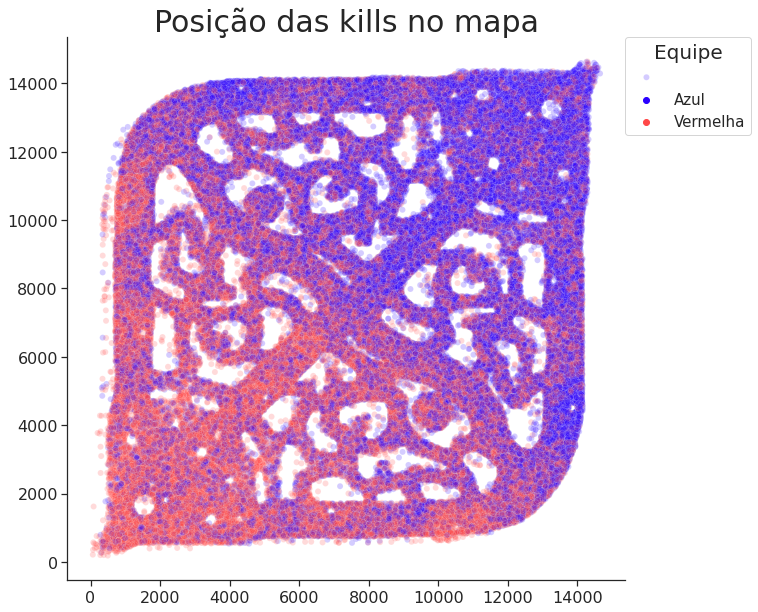

In [10]:
u = sns.scatterplot(data = dfKills, y = 'y_pos', x = 'x_pos', hue = 'Team', alpha = 0.2, palette = ['#2A00FF', '#FF4848'])
u.set_title('Posição das kills no mapa', fontsize = 30)
u.figure.set_size_inches(10, 10)
u.tick_params(labelsize = 16)
u.set_xlabel('')
u.set_ylabel('')
u.legend(title = 'Equipe', title_fontsize = 20,
        labels = ['','Azul','Vermelha'], bbox_to_anchor = (1, 1),
        loc  ='upper left', prop = {'size': 15},
        borderaxespad = 0)


Depois de vermos as kills do jogo, notou-se que esse comportamento poderia ser diferente pelo tempo de jogo (_Early Game_, _Mid Game_ e _Late Game_).

In [11]:
EarlyKill = dfKills.loc[dfKills.Time <= 15]
MidKill = dfKills.loc[(dfKills.Time > 15) & (dfKills.Time < 25)]
LateKill = dfKills.loc[dfKills.Time > 25]

In [12]:
EarlyKill.head(5)

Address    Team    Time  \
0   http://matchhistory.na.leagueoflegends.com/en/...  bKills  10.820   
25  http://matchhistory.na.leagueoflegends.com/en/...  bKills  11.104   
26  http://matchhistory.na.leagueoflegends.com/en/...  bKills  12.332   
27  http://matchhistory.na.leagueoflegends.com/en/...  bKills  12.392   
28  http://matchhistory.na.leagueoflegends.com/en/...  bKills  12.665   

          Victim        Killer     Assist_1  Assist_2   Assist_3 Assist_4  \
0         C9 Hai  TSM Bjergsen          NaN       NaN        NaN      NaN   
25  DIG Shiphtur     CST Jesiz  CST Impaler       NaN        NaN      NaN   
26   DIG Crumbzz      CST Cris    CST Sheep       NaN        NaN      NaN   
27    DIG CoreJJ      CST Cris  CST Impaler  CST Mash        NaN      NaN   
28     DIG Gamsu      CST Cris  CST Impaler  CST Mash  CST Sheep      NaN   

      x_pos   y_pos bResult  
0    9229.0  8469.0     Win  
25   9294.0  8716.0   Loser  
26   9601.0  5282.0   Loser  
27   9967.0  6811.0   Loser  
28  10870.0  5390.0   Loser

#### 2.5.1.2 Frequencia de Kills

Aqui conseguimos ver a frequencia de abatimentos no inicio do jogo. Durante a fase de  rotas (onde as pessoas estão evitando confrontos) consegue-se notar que o crecimento de kill é constante pelo tempo de jogo, aumentando proximo aos 3 minutos, que é o tempo que o 'Jungler' leva para _farmar_ a sua _jungle_. Assim, ele pode _Gankar_ as outras lanes e garantir abatimentos para seu time. A partir dos 8 minutos os abates aumentam, visto que os objetivos começam a surgir e os objetivos se tornam parte crucial para a vantagem do jogo.

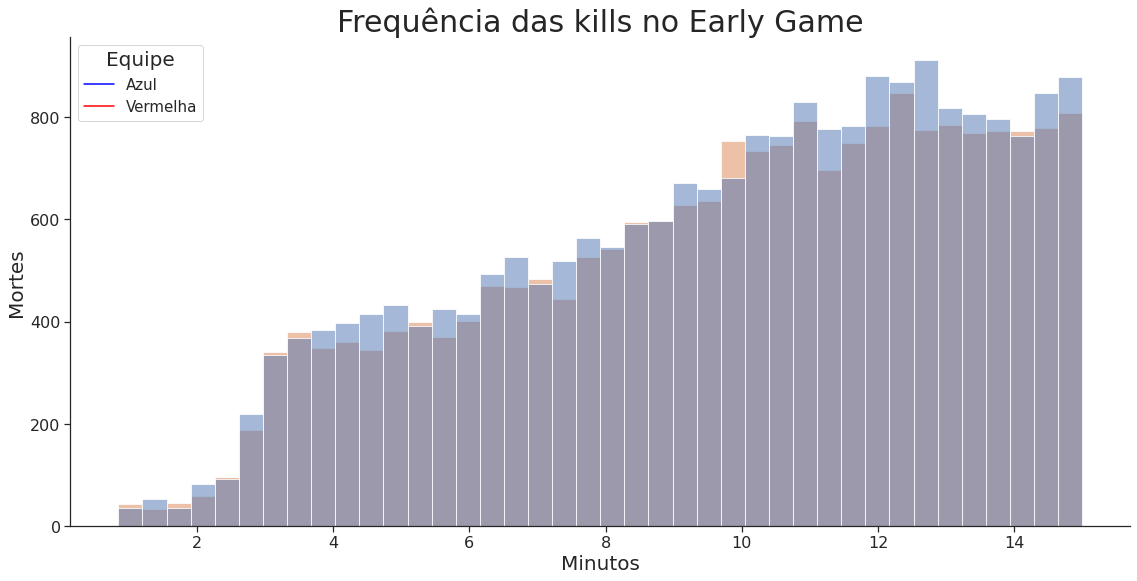

In [13]:
ax = sns.histplot(data = EarlyKill, x = 'Time', hue = 'Team', bins = 40)
ax.set_title('Frequência das kills no Early Game', fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Mortes', fontsize = 20)
ax.figure.set_size_inches(19, 9)

l1 = mlines.Line2D([], [], color = 'blue', ls = '-', label = 'Azul')
l2 = mlines.Line2D([], [], color = 'red', ls = '-', label = 'Vermelha')


ax.legend(loc = 'upper left', title = 'Equipe', title_fontsize = 20, fontsize = 15, handles = [l1, l2])
ax.tick_params(labelsize = 16)

No _Mid Game_ os abates mantem uma frequencia estavel de aparecimentos, visto que nesse momento as _lanes_ começam a rotacionar para ganharem presença de mapa e garantir objetivos. Porem não são muitas, visto que muitos abates para seu time nesse momento podem garantir ao time inimigo conquista de torres e, consequentemente, proximidade ao _nexus_.

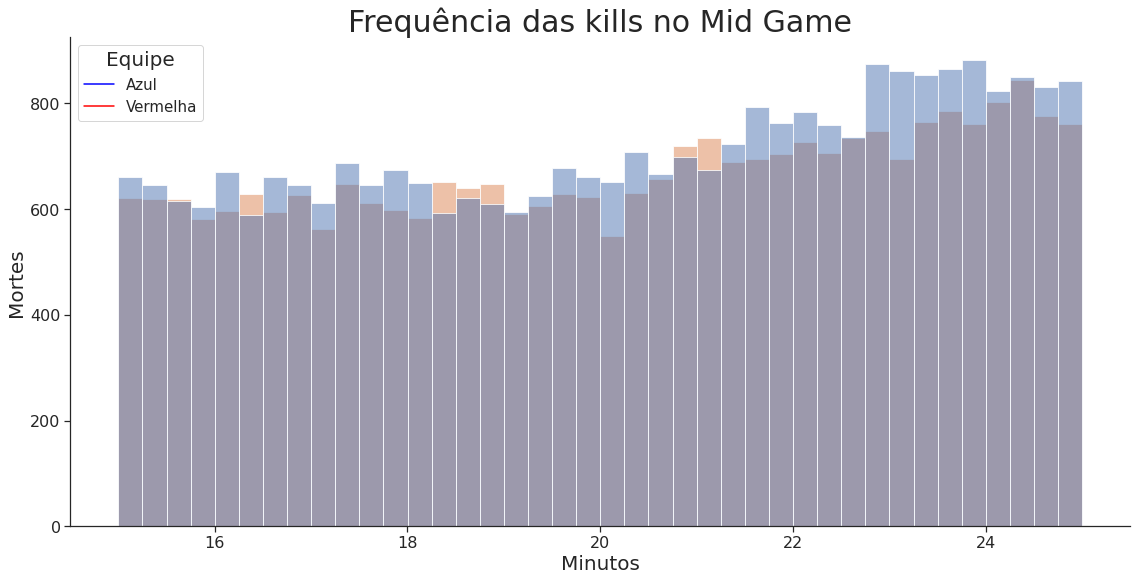

In [14]:
ax = sns.histplot(data = MidKill, x = 'Time', hue = 'Team', bins = 40)
ax.set_title('Frequência das kills no Mid Game', fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Mortes', fontsize = 20)
ax.figure.set_size_inches(19, 9)

l1 = mlines.Line2D([], [], color = 'blue', ls = '-', label = 'Azul')
l2 = mlines.Line2D([], [], color = 'red', ls = '-', label = 'Vermelha')


ax.legend(loc = 'upper left', title = 'Equipe', title_fontsize = 20, fontsize = 15, handles = [l1, l2])
ax.tick_params(labelsize = 16)

Com o aumento do tempo de jogo o renascimento dos campeões fica cada vez mais demorado, ou seje, a frequencia de lutas diminui exponencialmente. Muitos jogos são encerrados até os 40 primeiros minutos, assim, pouquissimos são os jogos com até 60 minutos de duração.

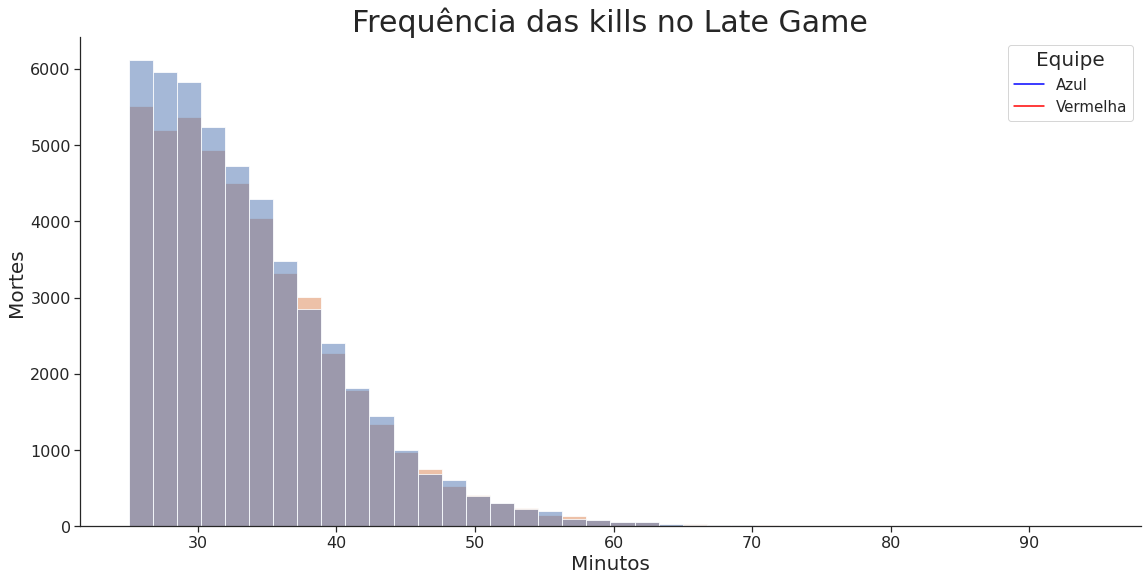

In [15]:
ax = sns.histplot(data = LateKill, x = 'Time', hue = 'Team', bins = 40)
ax.set_title('Frequência das kills no Late Game', fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Mortes', fontsize = 20)
ax.figure.set_size_inches(19, 9)

l1 = mlines.Line2D([], [], color = 'blue', ls = '-', label = 'Azul')
l2 = mlines.Line2D([], [], color = 'red', ls = '-', label = 'Vermelha')


ax.legend(loc = 'upper right', title = 'Equipe', title_fontsize = 20, fontsize = 15, handles = [l1, l2])
ax.tick_params(labelsize = 16)

#### 2.5.1.2 Kill no mapa por tempo de jogo

Gerando o grafico de dispersão das _kills_ conseguimos notar onde os abates ocorrem no game. Durante o inicio do jogo (>15 minutos) os abates são concentrados nas rotas e na região central (rio e selva). Focados em manter um controle de rotas os jogadores mantem um jogo mais seguro, evitando avançar muito e garantindo objetivos.

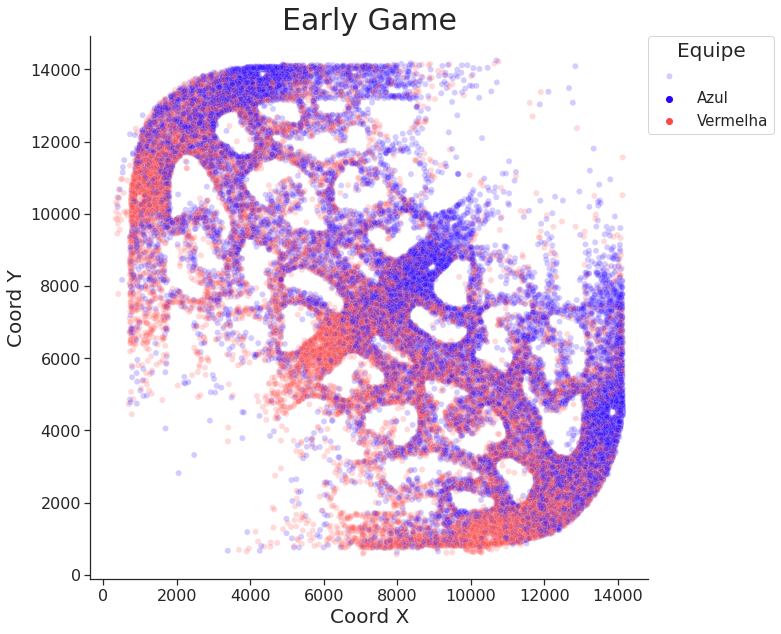

In [16]:
u = sns.scatterplot(data = EarlyKill, y = 'y_pos', x = 'x_pos', hue = 'Team', alpha = 0.2, palette = ['#2A00FF', '#FF4848'])
u.set_title('Early Game', fontsize = 30)
u.figure.set_size_inches(10, 10)
u.tick_params(labelsize = 16)

u.set_xlabel('Coord X', fontsize = 20)
u.set_ylabel('Coord Y', fontsize = 20)

u.legend(title = 'Equipe', title_fontsize = 20,
        labels = ['','Azul','Vermelha'], bbox_to_anchor = (1, 1),
        loc  ='upper left', prop = {'size': 15},
        borderaxespad = 0)

Durante o meio do jogo (15 à 25 minutos) os times começama  avançar no jogo e conquistar o maximo de objetivos possiveis. Levando torres e conquistando espaços no mapa.
* Alguns jogos terminam nesse momento 

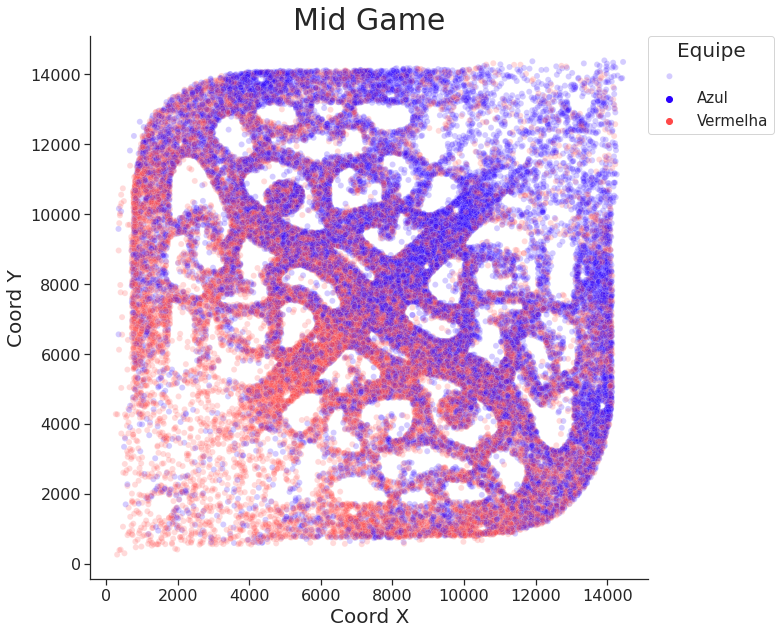

In [17]:
u = sns.scatterplot(data = MidKill, y = 'y_pos', x = 'x_pos', hue = 'Team', alpha = 0.2, palette = ['#2A00FF', '#FF4848'])
u.set_title('Mid Game', fontsize = 30)
u.figure.set_size_inches(10, 10)
u.tick_params(labelsize = 16)
u.set_xlabel('Coord X', fontsize = 20)
u.set_ylabel('Coord Y', fontsize = 20)

u.legend(title = 'Equipe', title_fontsize = 20,
        labels = ['','Azul','Vermelha'], bbox_to_anchor = (1, 1),
        loc  ='upper left', prop = {'size': 15},
        borderaxespad = 0)

No fim de jogo o objetivo é conquistar a base inimiga, conseguimos notar a diminuição da concentração dos abates nas extreminades e concentrado (mais denso) na região das bases e no meio (rota mais utilizada para a conquista)

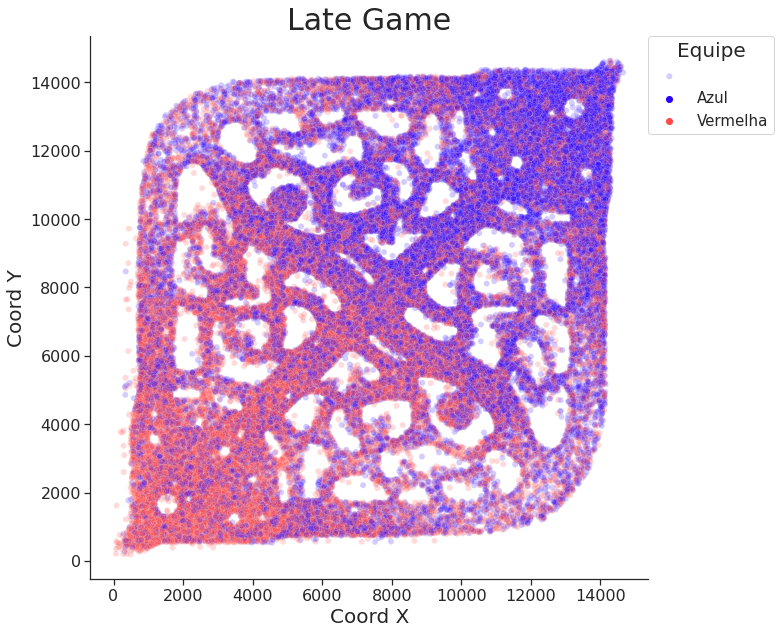

In [18]:
u = sns.scatterplot(data = LateKill, y = 'y_pos', x = 'x_pos', hue = 'Team', alpha = 0.2, palette = ['#2A00FF', '#FF4848'])
u.set_title('Late Game', fontsize=30)
u.figure.set_size_inches(10, 10)
u.tick_params(labelsize = 16)
u.set_xlabel('Coord X', fontsize = 20)
u.set_ylabel('Coord Y', fontsize = 20)

u.legend(title = 'Equipe', title_fontsize = 20,
        labels = ['','Azul','Vermelha'], bbox_to_anchor = (1, 1),
        loc  ='upper left', prop = {'size': 15},
        borderaxespad = 0)

#### ##CRIAR IMAGENS PARA O GIF

In [19]:

# for i in range(72):
#         gif = dfKills.loc[(dfKills.Time >= i) & (dfKills.Time <= i+1)]
#         u = sns.scatterplot(data = gif, y = 'y_pos', x = 'x_pos', hue = 'Team', alpha = 0.2, palette = ['#2A00FF', '#FF4848'])
#         u.set_title(f'Kills por tempo {i}min', fontsize=30)
#         u.figure.set_size_inches(10, 10)
#         u.tick_params(labelsize = 16)
#         u.set_xlabel('Coord X', fontsize = 20)
#         u.set_ylabel('Coord Y', fontsize = 20)
        
#         u.legend(title = 'Equipe', title_fontsize = 20,
#         labels = ['','Azul','Vermelha'], bbox_to_anchor = (1, 1),
#         loc  ='upper left', prop = {'size': 15},
#         borderaxespad = 0)
        
#         plt.savefig(f'Graficos/{i}.png')
#         plt.clf()


##CRIAR IMAGENS PARA O GIF


<img title= "Kills por tempo de jogo" src="Features/gif_kill.gif">

#### 2.5.1.3 Por vitoria do time

Conseguimos ver a concentração de abates do time em relaçao a vitoria ou derrota. A primeira linha são os abates do a equipe azul, a esquerda quando o azul está em vitoria (a concentração de abates são maiores na região superior) e em derrota (maior concentração de abate na região inferior, visto que tentam defender a sua base)

Na região inferior tem os abates do time vermelho, visto que os dados foram coletados sobre as vitorias do time azul pela coluna `bResult`. Assim, em "Win" temos a derrota do time vermelho e em "loser" a vitoria do time vermelho. Seguindo a mesma logica do time azul o time vermelho se organiza no mapa.

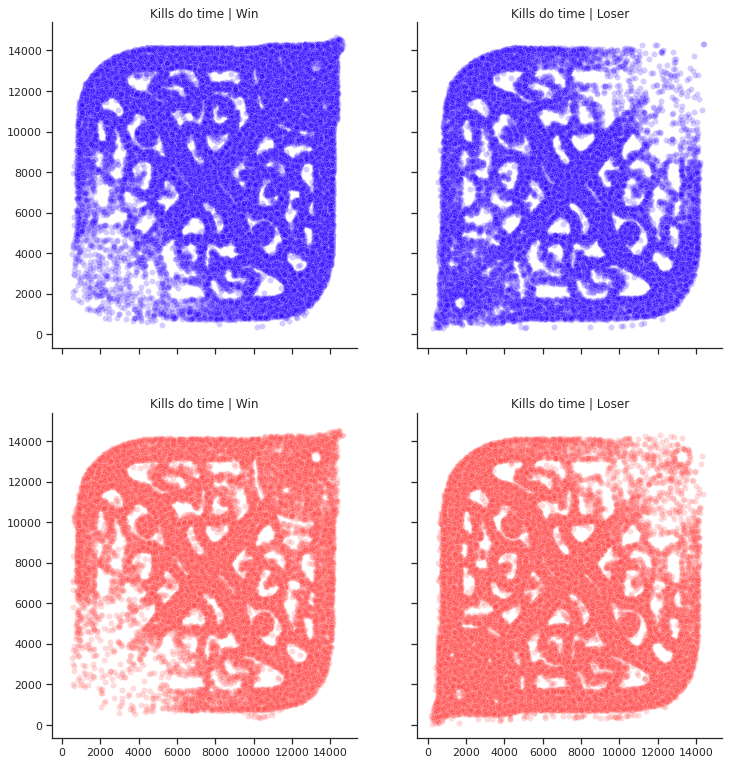

In [20]:
u = sns.FacetGrid(dfKills, col='bResult', row= "Team", hue="Team", palette = ['#2A00FF', '#FF4848'])
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.2)
u.figure.set_size_inches(12, 12)
u.set_axis_labels(x_var='', y_var='')
u.set_titles(col_template="{col_name}", row_template="Kills do time")

#### 2.5.1.4 Separando por tempo de jogo
A cada tempo de jogo bemos como os times se organizam
no Early game não há muita diferença, pois até esse momento não há como saber qual time pode ganhar

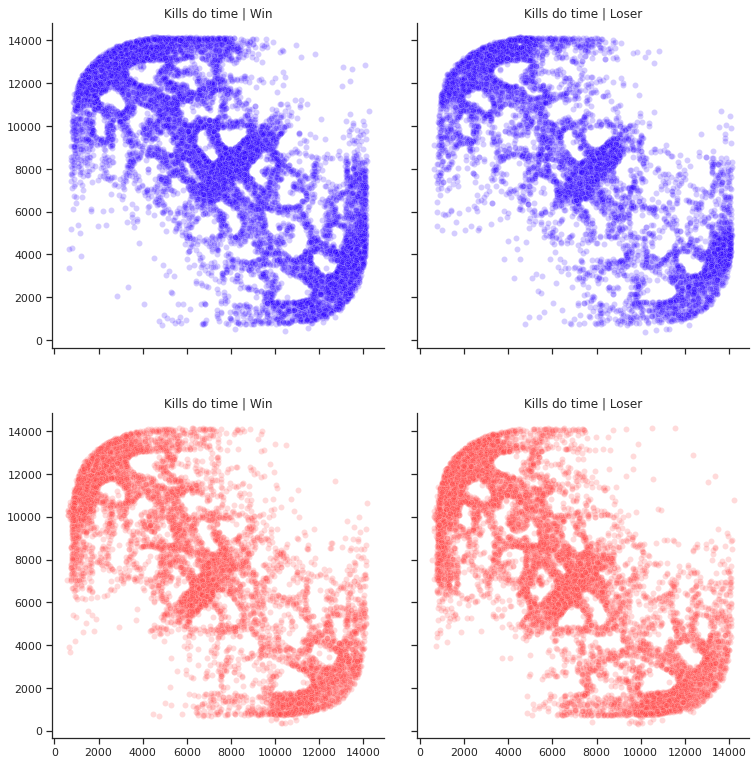

In [21]:
u = sns.FacetGrid(EarlyKill, col='bResult', row= "Team", hue="Team", palette = ['#2A00FF', '#FF4848'])
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.2)
u.figure.set_size_inches(12, 12)
u.set_axis_labels(x_var='', y_var='')
u.set_titles(col_template="{col_name}", row_template="Kills do time")

Aqui começamos a ver a concentração maior dos dados nas regiões extremas e no centro do jogo, visto que surge a necessidade de conseguir conquistar mais espaço de mapa.

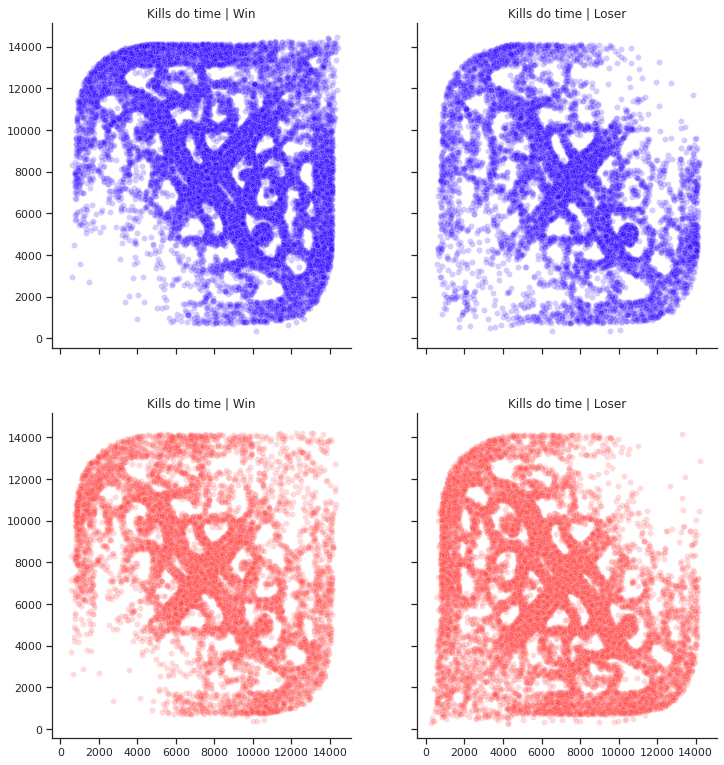

In [22]:
u = sns.FacetGrid(MidKill, col='bResult', row= "Team", hue="Team", palette = ['#2A00FF', '#FF4848'])
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.2)
u.figure.set_size_inches(12, 12)
u.set_axis_labels(x_var='', y_var='')
u.set_titles(col_template="{col_name}", row_template="Kills do time")

No final os abates concentram-se nas regiões extremas, visto que os jogadores concentram-se em levar o jogo e finalizar o mais rapido possivel

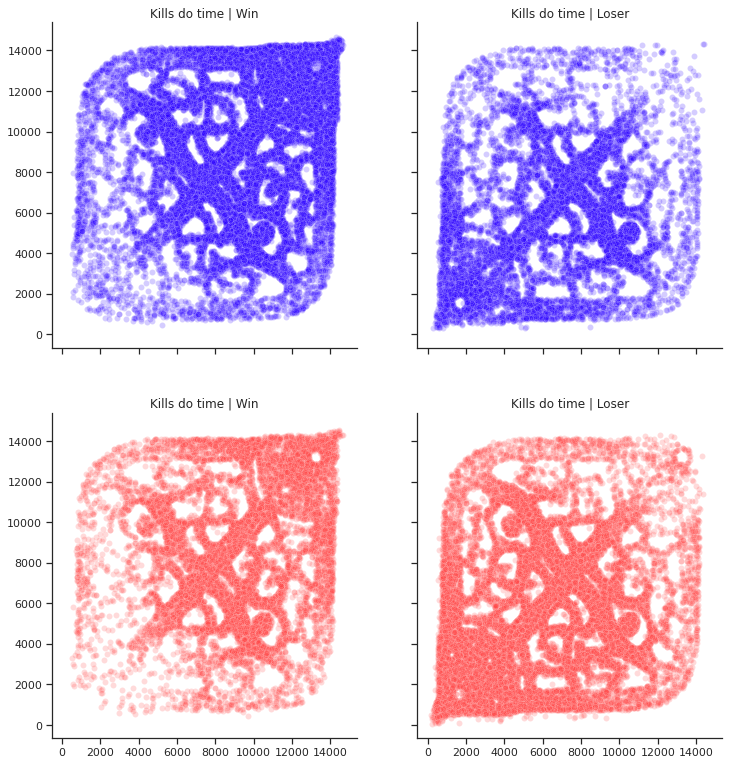

In [23]:
u = sns.FacetGrid(LateKill, col='bResult', row= "Team", hue="Team", palette = ['#2A00FF', '#FF4848'])
u.map(sns.scatterplot,'y_pos', 'x_pos', alpha = 0.2)
u.figure.set_size_inches(12, 12)
u.set_axis_labels(x_var='', y_var='')
u.set_titles(col_template="{col_name}", row_template="Kills do time")

### 2.5.2 Analises de Ouro

Após a analise de mapa, surge a necessidade de observar o comportamento de ouro por tempo. Será que a vantagem de ouro pode garantir a vitoria de um time? Nos proximos graficos será possivel observar essa relação

In [24]:
dfGold = pd.read_csv('Datasets/gold.csv')
dfGold.merge(df_jogos)

Address            Type  \
0      http://matchhistory.na.leagueoflegends.com/en/...        golddiff   
1      http://matchhistory.na.leagueoflegends.com/en/...        goldblue   
2      http://matchhistory.na.leagueoflegends.com/en/...         goldred   
3      http://matchhistory.na.leagueoflegends.com/en/...     goldblueTop   
4      http://matchhistory.na.leagueoflegends.com/en/...  goldblueJungle   
...                                                  ...             ...   
99055  https://matchhistory.na.leagueoflegends.com/en...      goldredTop   
99056  https://matchhistory.na.leagueoflegends.com/en...   goldredJungle   
99057  https://matchhistory.na.leagueoflegends.com/en...   goldredMiddle   
99058  https://matchhistory.na.leagueoflegends.com/en...      goldredADC   
99059  https://matchhistory.na.leagueoflegends.com/en...  goldredSupport   

       min_1  min_2  min_3  min_4  min_5  min_6  min_7  min_8  ...  min_87  \
0          0      0    -14    -65   -268   -431   -488   -789  ...     NaN   
1       2415   2415   2711   3887   5068   6171   7412   8661  ...     NaN   
2       2415   2415   2725   3952   5336   6602   7900   9450  ...     NaN   
3        475    475    532    687    893   1058   1172   1471  ...     NaN   
4        475    475    532    870   1049   1276   1596   1815  ...     NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...  ...     ...   
99055    500    500    581   1005   1225   1600   1774   2196  ...     NaN   
99056    500    500    721   1015   1336   1614   1938   2230  ...     NaN   
99057    500    500    598    968   1165   1477   1801   2016  ...     NaN   
99058    500    500    587    954   1327   1749   2007   2471  ...     NaN   
99059    500    500    585    793    998   1201   1373   1619  ...     NaN   

       min_88  min_89  min_90  min_91  min_92  min_93  min_94  min_95  IdJogo  
0         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
1         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
2         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
3         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
4         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN       0  
...       ...     ...     ...     ...     ...     ...     ...     ...     ...  
99055     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  
99056     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  
99057     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  
99058     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  
99059     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN    7619  

[99060 rows x 98 columns]

In [25]:
dfGold.Type.unique()

array(['golddiff', 'goldblue', 'goldred', 'goldblueTop', 'goldblueJungle',
       'goldblueMiddle', 'goldblueADC', 'goldblueSupport', 'goldredTop',
       'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport'],
      dtype=object)

Para auxiliar a analise, o dataframe foi dividido em sub-dataframes para a realização das analises

In [26]:
dfGold_golddiff = dfGold.loc[dfGold.Type == 'golddiff'] 
dfGold_Team = dfGold.loc[(dfGold.Type == 'goldblue') |( dfGold.Type == 'goldred')]
dfGold_BlueChamps = dfGold.loc[ ( dfGold.Type == 'goldblueTop') |
                                ( dfGold.Type == 'goldblueJungle') |
                                ( dfGold.Type == 'goldblueMiddle') |
                                ( dfGold.Type == 'goldblueADC') |
                                ( dfGold.Type == 'goldblueSupport') ]
dfGold_RedChamps = dfGold.loc[ ( dfGold.Type == 'goldredTop') |
                                ( dfGold.Type == 'goldredJungle') |
                                ( dfGold.Type == 'goldredMiddle') |
                                ( dfGold.Type == 'goldredADC') |
                                ( dfGold.Type == 'goldredSupport') ]

In [27]:
dfGold_golddiff = dfGold_golddiff.replace(to_replace=np.nan, value=0)
dfGold_golddiff = dfGold_golddiff.merge(LeagueofLegends[['Address', 'bResult', 'golddiff']])
dfGold_golddiff.bResult = dfGold_golddiff.bResult.map({1 : 'Win', 0 : 'Loser'})
dfGold_golddiff.head(5)

Address      Type  min_1  min_2  \
0  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
1  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
2  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
3  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0      0   
4  http://matchhistory.na.leagueoflegends.com/en/...  golddiff     40     40   

   min_3  min_4  min_5  min_6  min_7  min_8  ...  min_88  min_89  min_90  \
0    -14    -65   -268   -431   -488   -789  ...     0.0     0.0     0.0   
1    -26    -18    147    237   -152     18  ...     0.0     0.0     0.0   
2     10    -60     34     37    589   1064  ...     0.0     0.0     0.0   
3    -15     25    228     -6   -243    175  ...     0.0     0.0     0.0   
4     44    -36    113    158   -121   -191  ...     0.0     0.0     0.0   

   min_91  min_92  min_93  min_94  min_95  bResult  \
0     0.0     0.0     0.0     0.0     0.0      Win   
1     0.0     0.0     0.0     0.0     0.0    Loser   
2     0.0     0.0     0.0     0.0     0.0      Win   
3     0.0     0.0     0.0     0.0     0.0    Loser   
4     0.0     0.0     0.0     0.0     0.0      Win   

                                            golddiff  
0  [0, 0, -14, -65, -268, -431, -488, -789, -494,...  
1  [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...  
2  [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...  
3  [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...  
4  [40, 40, 44, -36, 113, 158, -121, -191, 23, 20...  

[5 rows x 99 columns]

Devido a grande presença de dados, foi retirado uma amostra com 20 dados para a visualização grafica da difereça de ouro

In [28]:
amostraGold = dfGold_golddiff.sample(n=20, random_state=1)
amostraGoldBlue = amostraGold.loc[amostraGold.bResult == 'Win'].drop(columns = 'golddiff')
amostraGoldRed = amostraGold.loc[amostraGold.bResult == 'Loser'].drop(columns = 'golddiff')
TAmostraGoldBlue = amostraGoldBlue.T
TAmostraGoldRed = amostraGoldRed.T
TAmostraGoldBlue = TAmostraGoldBlue[2:97:1]
TAmostraGoldRed = TAmostraGoldRed[2:97:1]
idx = range(1,95)
TAmostraGoldBlue['minutos'] = range(1,96)
TAmostraGoldRed['minutos'] = range(1,96)
TAmostraGoldBlue = TAmostraGoldBlue.set_index('minutos')
TAmostraGoldRed = TAmostraGoldRed.set_index('minutos')
TAmostraGoldRed = TAmostraGoldRed *(-1) #Surge a necessidade de multiplicar o valor por menos um pois a referencia de diferença de ouro é sempre em relação ao time azul, logo, o time vermelho em vantagem fica negativo


In [29]:
amostraGold.head(2)

Address      Type  min_1  \
2702  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
3639  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   

      min_2  min_3  min_4  min_5  min_6  min_7  min_8  ...  min_88  min_89  \
2702      0    -32    -63   -200    127   -145   -158  ...     0.0     0.0   
3639    -10     30    258    338    137    382    380  ...     0.0     0.0   

      min_90  min_91  min_92  min_93  min_94  min_95  bResult  \
2702     0.0     0.0     0.0     0.0     0.0     0.0    Loser   
3639     0.0     0.0     0.0     0.0     0.0     0.0    Loser   

                                               golddiff  
2702  [0, 0, -32, -63, -200, 127, -145, -158, -306, ...  
3639  [0, -10, 30, 258, 338, 137, 382, 380, 134, 255...  

[2 rows x 99 columns]

In [30]:
TAmostraGoldBlue.head(2)

6242 1160 1409 5877 2851 4475 3014 5207 5107 6206
minutos                                                  
1          0    0    0    0    0    0    0    0    0    0
2         10  -20    0    0    0    0  -16    0   30    8

In [31]:
np.array(TAmostraGoldBlue.columns)

array([6242, 1160, 1409, 5877, 2851, 4475, 3014, 5207, 5107, 6206],
      dtype=object)

Aqui podemos Ver a diferença de ouro por time para o time azul em vitoria. Os valores acima do eixo 0 é a diferença positiva ao time azul. Nota-se que, nesse espaço amostral, a diferença de ouro foi auxiliar no processo de vitoria, visto que em todas as vitorias o time consegue ter mais ouro que o time azul

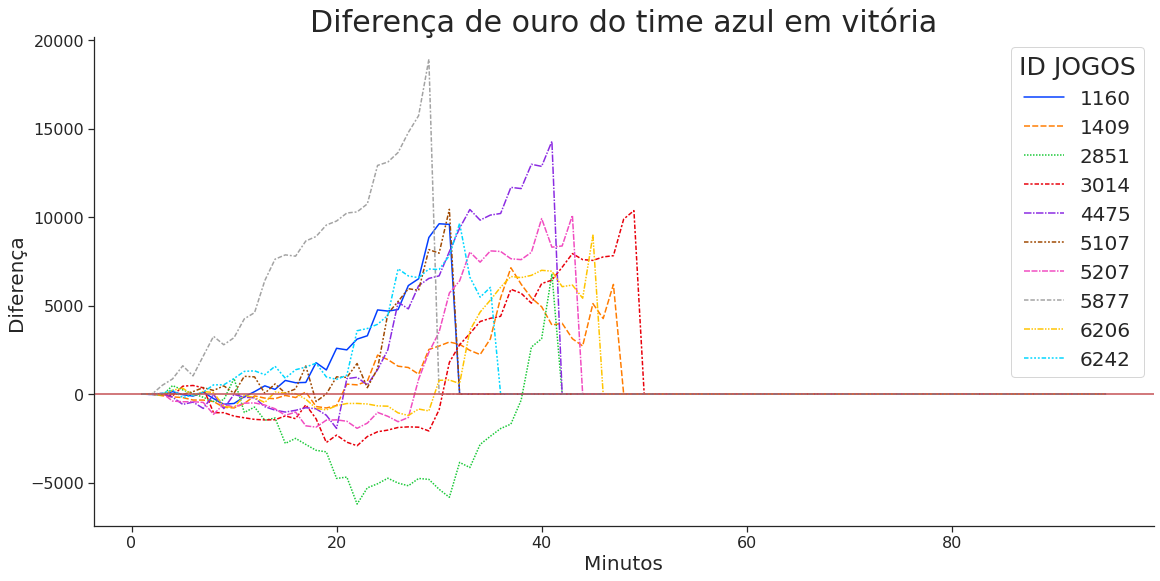

In [32]:
ax = sns.lineplot(data = TAmostraGoldBlue, palette = 'bright')
ax.axhline(y = 0, color = 'r', linestyle = '-')
ax.set_title("Diferença de ouro do time azul em vitória", fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Diferença', fontsize = 20)
ax.tick_params(labelsize = 16)
ax.figure.set_size_inches(19,9)
ax.legend(title = 'ID JOGOS', title_fontsize = 25, fontsize=20)

Diferente do esperado, nas amostras coletadas, o time vermelho em vitoria possui vitorias em que possuia diferença de ouro negativa. Ou seja, o ouro não é um indicador de garantia de viotria de um jogo.

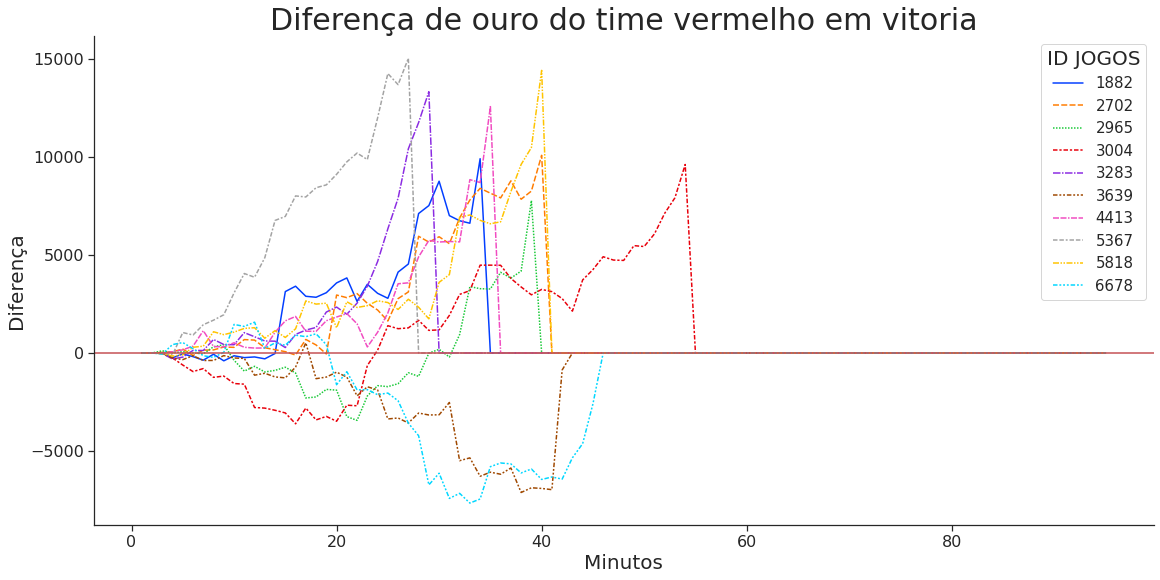

In [33]:
ax = sns.lineplot(data = TAmostraGoldRed, palette = 'bright')
ax.figure.set_size_inches(16,9)
plt.axhline(y = 0, color = 'r', linestyle = '-')
ax.set_title("Diferença de ouro do time vermelho em vitoria", fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Diferença', fontsize = 20)
ax.tick_params(labelsize = 16)
ax.figure.set_size_inches(19, 9)
ax.legend(title = 'ID JOGOS', title_fontsize = 20, fontsize = 15)

In [34]:
amostraGoldBlue.head(2)

Address      Type  min_1  \
6242  http://matchhistory.na.leagueoflegends.com/en/...  golddiff      0   
1160  http://matchhistory.euw.leagueoflegends.com/en...  golddiff      0   

      min_2  min_3  min_4  min_5  min_6  min_7  min_8  ...  min_87  min_88  \
6242     10     44    244   -199    -44    111    524  ...     0.0     0.0   
1160    -20    -35    143    -32   -110    109   -251  ...     0.0     0.0   

      min_89  min_90  min_91  min_92  min_93  min_94  min_95  bResult  
6242     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  
1160     0.0     0.0     0.0     0.0     0.0     0.0     0.0      Win  

[2 rows x 98 columns]

### 2.5.3 Vitorias por time

*Será que algum lado ganha mais partidas do que o outro?*
Aqui nota-se que o lado azul possui mais viotrias do que o lado vermelho. Isso pode se dá por varios fatores subjetivos. 

A _RiotGames_ (Desenvolvedora do jogo) já confirmou que os minions do lado azul são mais rapidos e possuem mais danos do que os minions da outra cor. Alem do acesso direto e mais rapido do time azul a objetivos, no ponto de vista fisico. Alem disso, há o fator que o time azul, em interface visual, possui mais vantagens, pous para o time vermelho os inimigos, em alguns momentos, ficam abaixo da linha de habilidades, o que pode prejudicar a jogabilidade do jogador.

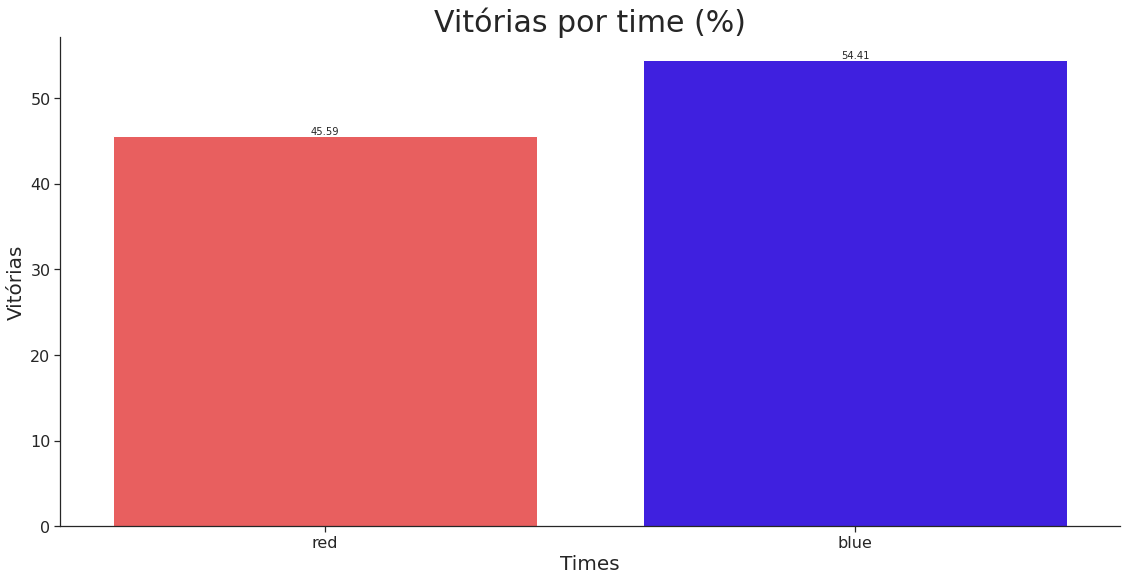

In [35]:
labels = ['red', 'blue']
wins = [dfmatchinfo.rResult.sum(), dfmatchinfo.bResult.sum()]
total = wins[0]+wins[1]
wins = [(dfmatchinfo.rResult.sum()*100)/total, (dfmatchinfo.bResult.sum()*100)/total]
wg = sns.barplot(x = labels, y = wins, palette = ['#FF4848', '#2A00FF'])
wg.set_xlabel('Times', fontsize = 20)
wg.set_ylabel('Vitórias',fontsize = 20)
wg.figure.set_size_inches(19, 9)
wg.set_title('Vitórias por time (%)', fontsize = 30)
for i in wg.containers:
    wg.bar_label(i, fmt = "%.2f")
wg.tick_params(labelsize = 16)

### 2.5.4 Partidas por temporada

Aqui separa-se os jogos pela temporada (verão ou inverno), nota-se que há mais jogos no verão do que na primavera. Há uma hipotese para isso. Os jogos no verão são jogos classificatorios para o Mundial (Worlds) o maior evento do ambiente competitivo do lol. Já os jogos de primavera são os classificatorios para o MSI (Mid-Season Invitational) o segundo maior evento competitivo do lol.

Assim, mais times preferem concorrer ao mundial do que ao MSI pela glória de seu time.

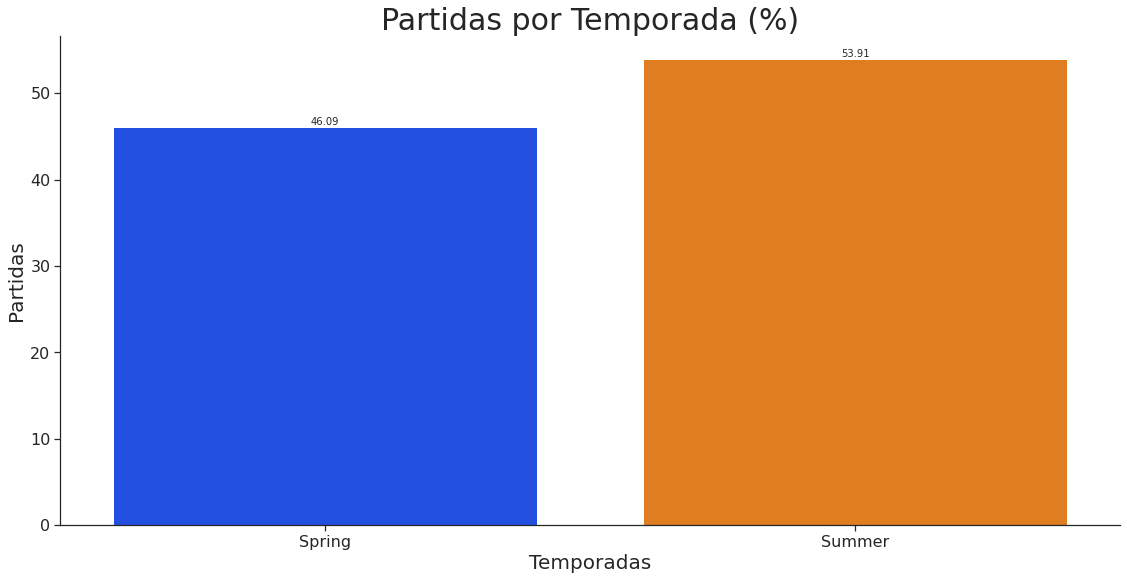

In [36]:
seasons = Counter(LeagueofLegends.Season)
totalseason = list(seasons.values())
totalseason = totalseason[0]+totalseason[1]
seasonsPer = [((list(seasons.values()))[0]*100/totalseason),((list(seasons.values()))[1]*100/totalseason)]
sg = sns.barplot(x = list(seasons.keys()), y = seasonsPer, palette = 'bright')

sg.figure.set_size_inches(19, 9)
sg.set_xlabel('Temporadas', fontsize = 20)
sg.set_ylabel('Partidas', fontsize = 20)
sg.set_title('Partidas por Temporada (%)', fontsize = 30)
for i in sg.containers:
    sg.bar_label(i, fmt = "%.2f")
sg.tick_params(labelsize = 16)

### 2.5.5 Ordens de monstro para levar

Existe ordem para levar os monstros grandes? (Objetivos)
Aqui será apresentado diversos graficos de histograma pelo tempo de jogo e a frequencia de captura dos objetivos. Nota-se que alguns objetivos implicam em mais vitorias do que outros (no cenario competitivo)

In [37]:
dfMonsters = pd.read_csv('Datasets/monsters.csv')
dfMonsters = dfMonsters.merge(df_jogos)
dfMonsters = dfMonsters.merge(LeagueofLegends[['bResult', 'Address']])
dfMonsters['bResult'] = dfMonsters.bResult.map({1 : 'Win', 0 : 'Loser'})

In [38]:
dfMonsters.head(2)

Address      Team    Time  \
0  http://matchhistory.na.leagueoflegends.com/en/...  bDragons  37.267   
1  http://matchhistory.na.leagueoflegends.com/en/...  rDragons  17.140   

     Type  IdJogo bResult  
0  DRAGON       0     Win  
1  DRAGON       0     Win

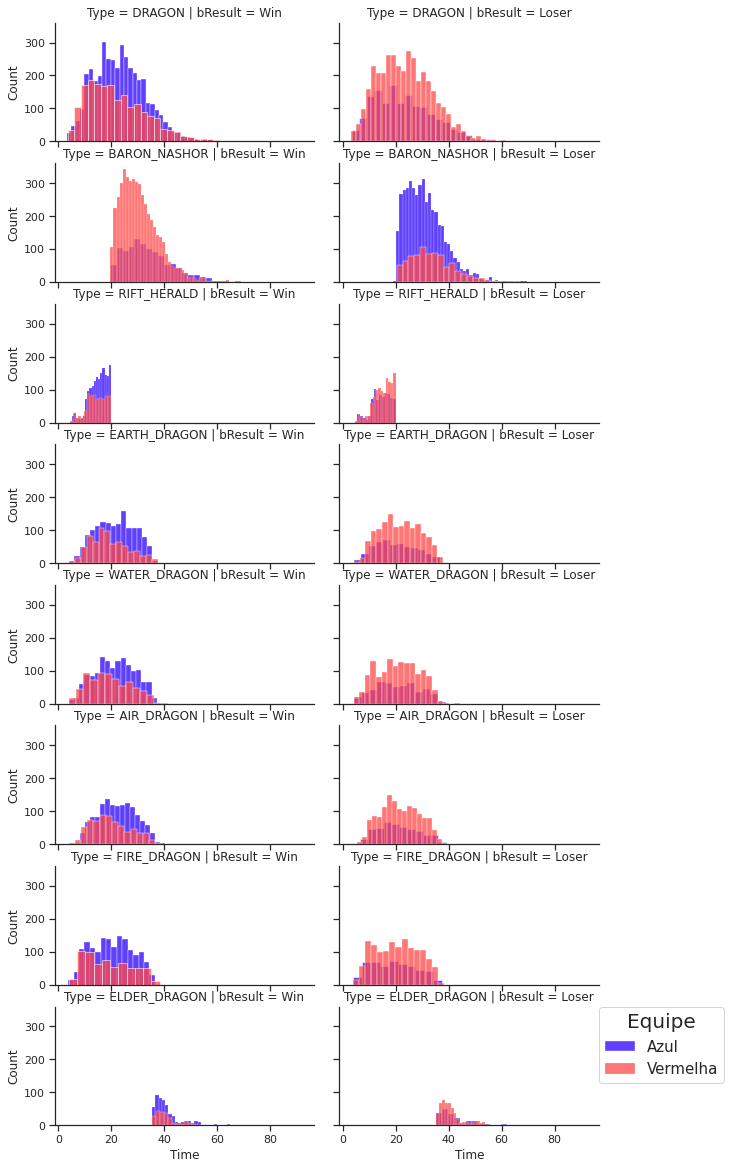

In [39]:
mg = sns.FacetGrid(data=dfMonsters, row = 'Type', col = 'bResult', hue = 'Team', palette = ['#2A00FF', '#FF4848'])
mg.map(sns.histplot, 'Time')
mg.figure.set_size_inches(9,16)
plt.legend(title = 'Equipe', title_fontsize = 20,
        labels = ['Azul','Vermelha'], bbox_to_anchor = (1, 1),
        loc  = 'upper left', prop = {'size': 15},
        borderaxespad = 0)

Nota-se que os dragões são os monstros que mais implicam vitorias, visto que seus efeitos (buffs) não são temporarios, logo, surge mais vantagem ao time de garanti e conquistar esses objetivos para ficarem mais forte.

#### 2.5.5.1 Quando pegar o arauto

O arauto é um monstro que possui um efeito especial bem peculiar. Após ser derrotado ele deixa um olho para trás, ao ser usado esse olho permite invocar um monstro semelhar ao que foi derrotado. Ao ser invocado ele direciona-se até uma torre e dá uma cabeçada, dando dano a torre e auxiliando a derrubada da mesma.

Nesse histograma conseguimos ver a frequencia que o arauto foi feito, normalmente não surge a necessidade de faze-lo nos primeiros minutos de jogo, pois a fase inicial é dedicada a manter controle de _lane_ e _farm_. Por volta dos 11 minutos os times começam a rotacionar e conquistar espaços no mapa, devido a seu auxilio para levar torres, graças a seu dano massivo, o arauto normalmente é derrotado nesse momento

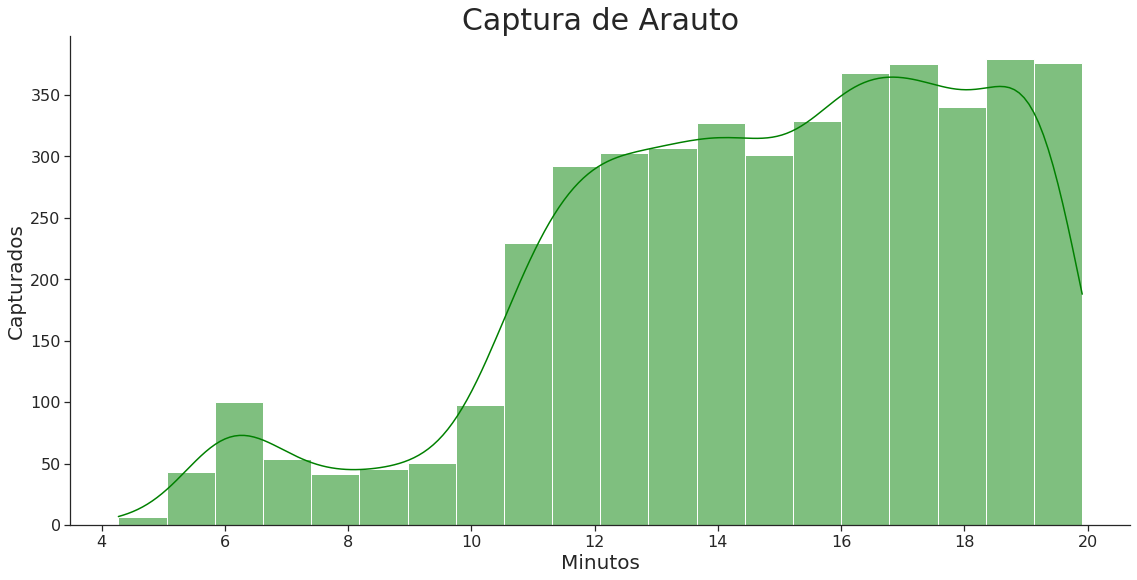

In [40]:
Arauto = dfMonsters.loc[dfMonsters.Type == 'RIFT_HERALD']
ax = sns.histplot(Arauto, x = 'Time', bins = 20, kde = True, color='green')
ax.set_title('Captura de Arauto', fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Capturados', fontsize = 20)
ax.figure.set_size_inches(19, 9)
ax.tick_params(labelsize = 16)

In [41]:
arautoBlue = Arauto.loc[Arauto.bResult == 'Win']
arautoRed = Arauto.loc[Arauto.bResult == 'Loser']

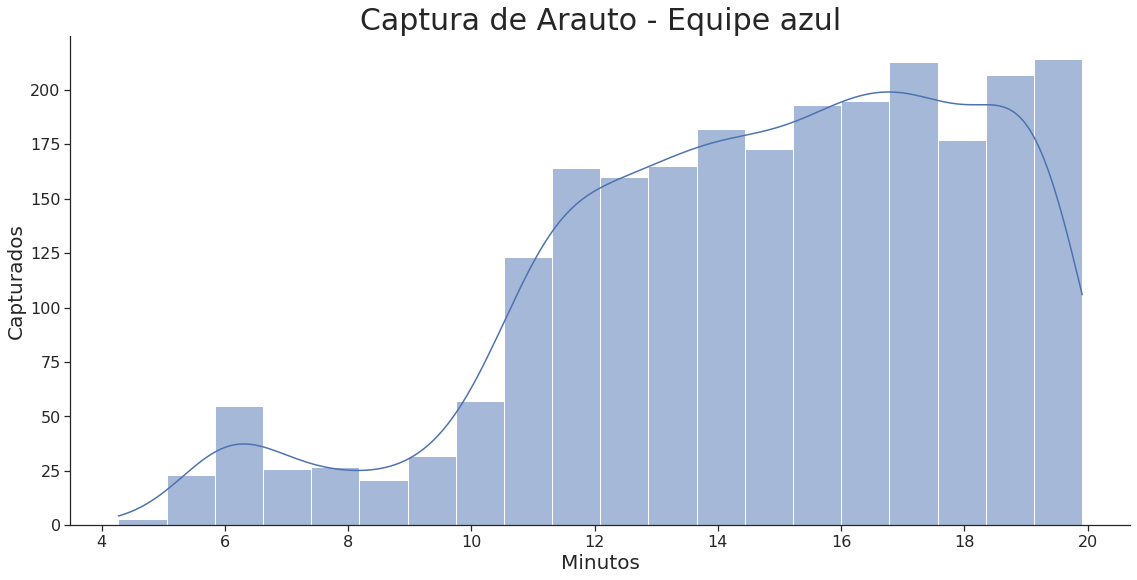

In [42]:
ax = sns.histplot(arautoBlue, x = 'Time', bins = 20, kde = True, color = 'b')
ax.set_title('Captura de Arauto - Equipe azul', fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Capturados', fontsize = 20)
ax.figure.set_size_inches(19, 9)
ax.tick_params(labelsize = 16)

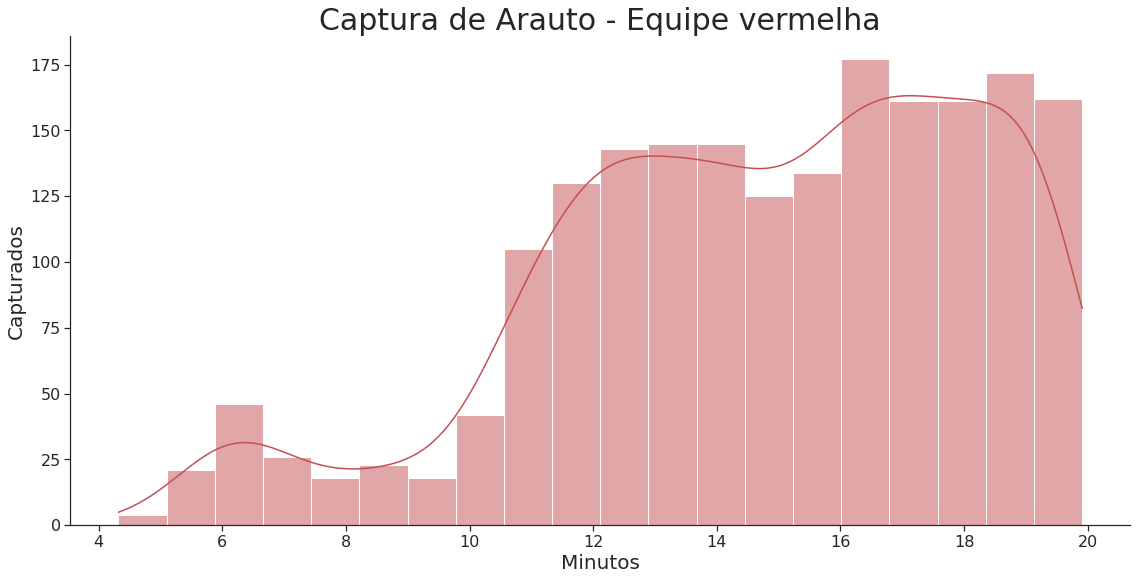

In [43]:
ax = sns.histplot(arautoRed, x = 'Time', bins = 20, kde = True, color = 'r')
ax.set_title('Captura de Arauto - Equipe vermelha', fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Capturados', fontsize = 20)
ax.figure.set_size_inches(19, 9)
ax.tick_params(labelsize = 16)

### 2.5.6 Análise de Matchs:

#### 2.5.6.1 Time que mais participou

SKT foi o time que mais participou dos campeonatos analisados!

In [44]:
blues = dfmatchinfo.blueTeamTag
reds = dfmatchinfo.redTeamTag
teams = pd.concat([blues, reds]).reset_index(drop = True)
contador_times = Counter(teams.dropna())
max(contador_times, key = contador_times.get)

'SKT'

#### 2.5.6.2 Time que mais ganhou

Visto que o SKT foi o que mais particiopou dos jogos, logo das etapas, acreditou-se que ele tambem foi o que mais ganhou. COmprovando, pelo seguinte grafico, a teoria

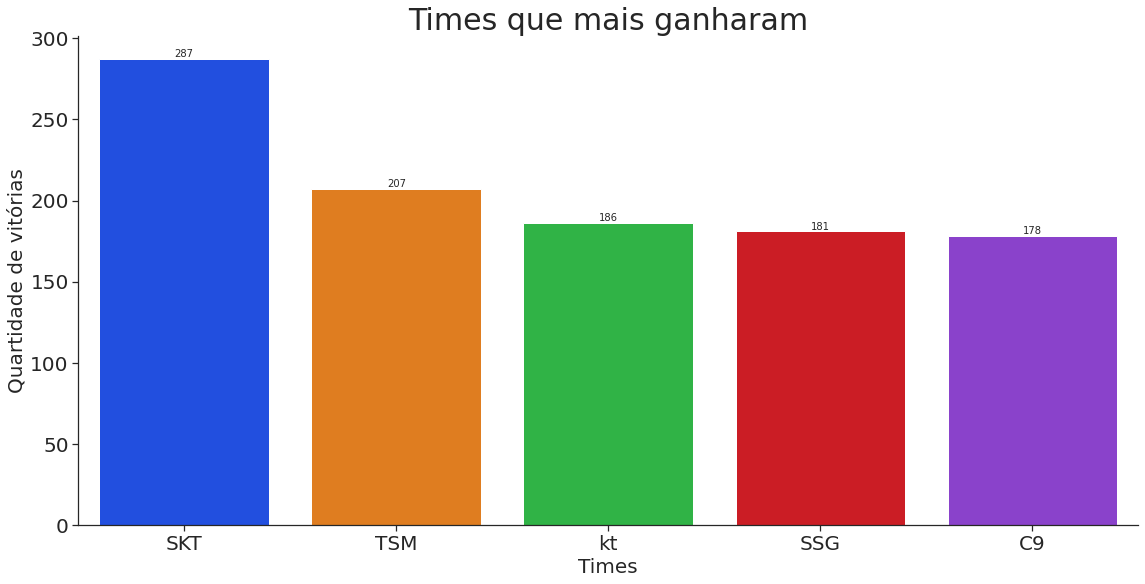

In [45]:
blues_wins = dfmatchinfo[dfmatchinfo.bResult == 1].dropna().value_counts('blueTeamTag')

red_wins = dfmatchinfo[dfmatchinfo.rResult == 1].dropna().value_counts('redTeamTag')

team_count = pd.DataFrame((blues_wins + red_wins)).reset_index()
team_count.columns = ['Time', 'q_vitorias']
team_count.sort_values(by = 'q_vitorias', ascending= False).head(5)
a = sns.barplot(data = team_count.sort_values(by = 'q_vitorias', ascending= False).head(5), 
                x = 'Time', y = 'q_vitorias', palette='bright')
a.set_title('Times que mais ganharam', fontsize = 30)
a.set_xlabel('Times', fontsize = 20)
a.set_ylabel('Quartidade de vitórias', fontsize = 20)
a.figure.set_size_inches(19, 9)
a.tick_params(labelsize = 20)
for i in a.containers:
    a.bar_label(i,)

#### 2.5.6.3 Time que mais perdeu

Os times que mais perderam nas competições analisadas poram esses! Nota-se a presenta da SSG nesse grafico tambem, mesmo sendo uma das que mais ganharam, esse time é está entre os 5 que mais perderam.

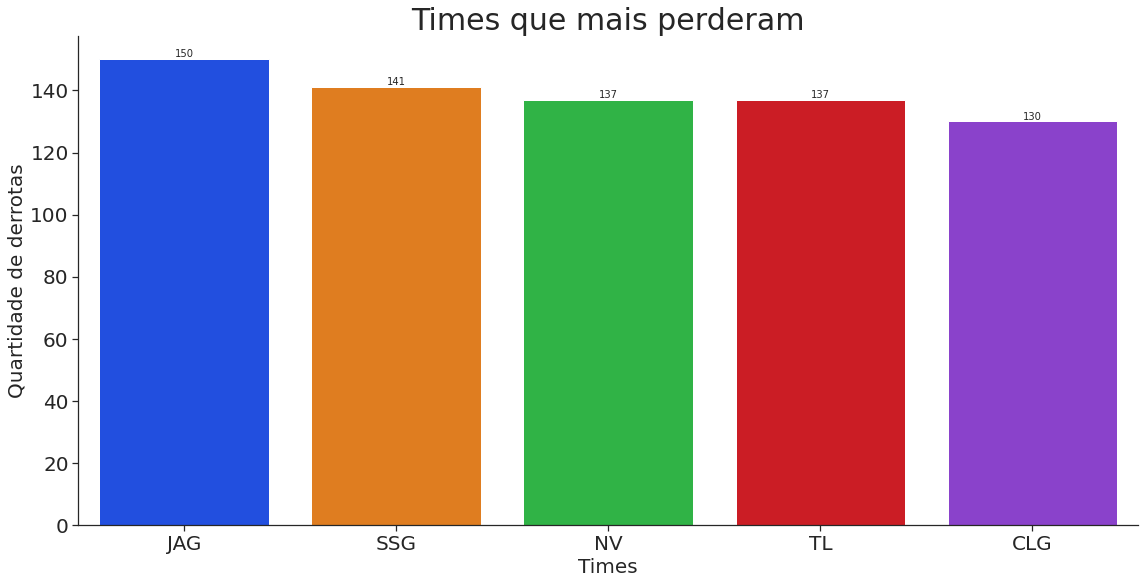

In [46]:
blues_loss = dfmatchinfo[dfmatchinfo.bResult == 0].dropna().value_counts('blueTeamTag')
red_loss = dfmatchinfo[dfmatchinfo.rResult == 0].dropna().value_counts('redTeamTag')

loss_count = pd.DataFrame((blues_loss + red_loss)).reset_index()
loss_count.columns = ['Time', 'q_derrotas']

a = sns.barplot(data = loss_count.sort_values(by = 'q_derrotas', ascending= False).head(), 
                x = 'Time', y = 'q_derrotas', palette='bright')
a.set_title('Times que mais perderam', fontsize = 30)
a.set_xlabel('Times', fontsize = 20)
a.set_ylabel('Quartidade de derrotas', fontsize = 20)
a.figure.set_size_inches(19, 9)
a.tick_params(labelsize = 20)
for i in a.containers:
    a.bar_label(i,)

#### 2.5.6.4 Qual campeão mais banido

Antes do inicio dos jogos os jogadores escolhem campeões para sem banidos, ou seja, não podem ser escolhidos para serem jogados. Normalmente é banidos campeões que o time inimigo possui grande vantagem ou campeões muito fortes. 

Vemos que a LeBlanc foi a campeã mais banida. Devido ao grande poder dessa campeã, nas mãos certas ela pode garantir vitorias ao time facilmente.

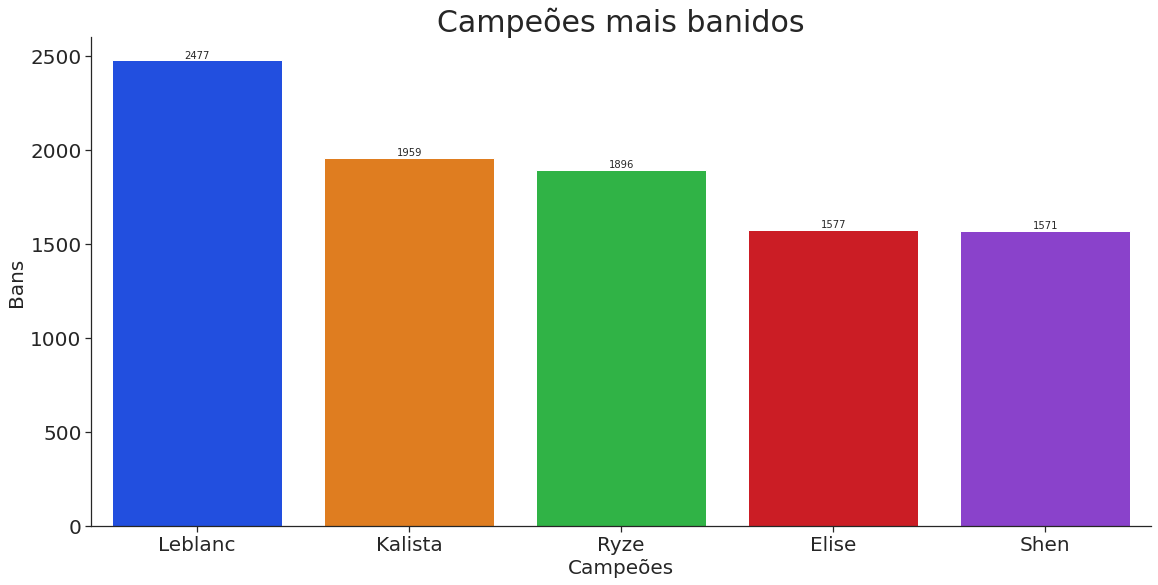

In [47]:
bans_df = pd.read_csv('Datasets/bans.csv')
banidos = pd.concat([bans_df.ban_1.dropna(), bans_df.ban_2.dropna(), bans_df.ban_3.dropna(), bans_df.ban_4.dropna(), 
                     bans_df.ban_5.dropna()]).reset_index(drop = True)
banidos_count = Counter(banidos)

banidos_count_s = pd.DataFrame(pd.Series(banidos_count))
banidos_count_s.reset_index(inplace=True)
banidos_count_s.columns = ['champ', 'count']

a = sns.barplot(data = banidos_count_s.sort_values(by = 'count', ascending=False).head(), x = 'champ', y = 'count', palette='bright')
a.set_title('Campeões mais banidos', fontsize = 30)
a.set_xlabel('Campeões', fontsize = 20)
a.set_ylabel('Bans', fontsize = 20)
a.figure.set_size_inches(19, 9)
a.tick_params(labelsize = 20)
for i in a.containers:
    a.bar_label(i,)

#### LeBlanc é a campeã mais banida!
<img title= "LeBlanc Meme" src="Features/LeblancMeme.jpg">

#### 2.5.6.5 Qual campeão mais usado:

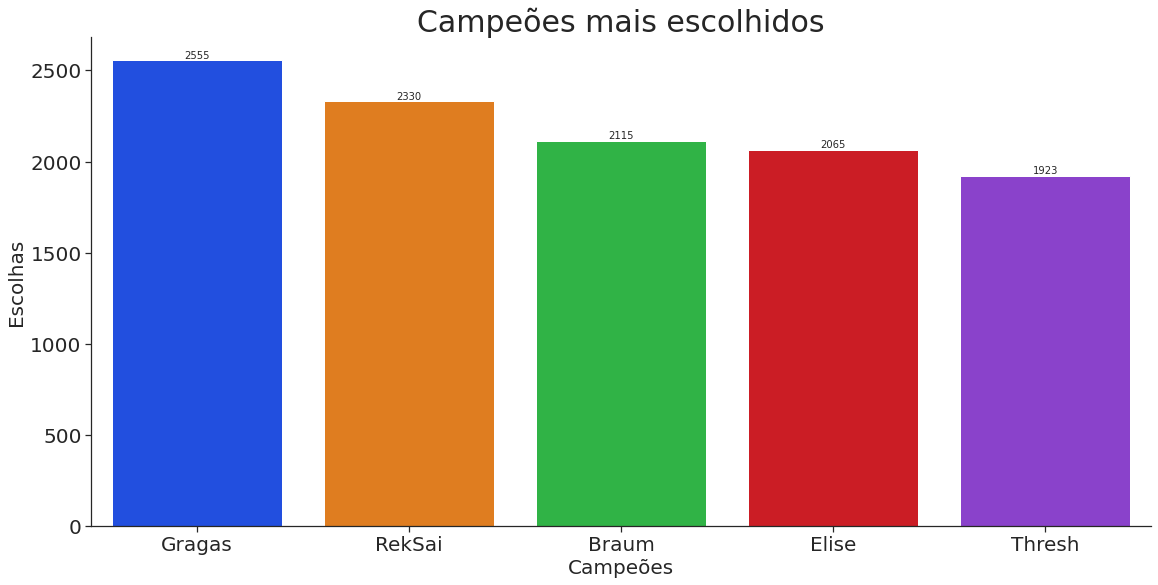

In [48]:
champ_coisas = []
for i in dfmatchinfo.columns:
    if 'Champ' in i:
        champ_coisas.append(eval('dfmatchinfo.'  + i))

series_champs = pd.concat(champ_coisas).reset_index(drop = True)
champs_frequency = pd.DataFrame(series_champs.value_counts()).reset_index()
champs_frequency.columns = ['champ', 'frequency']
champs_frequency.head(5)
champs_frequency

a = sns.barplot(data = champs_frequency.sort_values(by = 'frequency', ascending=False).head(), x = 'champ', y = 'frequency', palette='bright')
a.set_title('Campeões mais escolhidos', fontsize = 30)
a.set_xlabel('Campeões', fontsize = 20)
a.set_ylabel('Escolhas', fontsize = 20)
a.figure.set_size_inches(19, 9)
a.tick_params(labelsize = 20)
for i in a.containers:
    a.bar_label(i,)

#### Gragas é o campeão mais escolhido!
<img title= "Gragas Meme" src="Features/gragasMeme.jpeg">

#### 2.5.6.7 Campẽos mais escolhidos por rota:

In [49]:
routes = ['TopChamp', 'JungleChamp', 'MiddleChamp' ,'ADCChamp', 'SupportChamp']

a_list = []
for i in routes:
    ind = i + '_series' 
    seris = []
    for j in dfmatchinfo.columns:
        if 'Champ' in j and i in j:
            seris.append(eval('dfmatchinfo.'  + j))
    
    globals()[ind] = seris

    a_list.append(ind)
# Printe a_list para ver as variáveis que armazenam as lista de Series que geram os dfs (você provavelmente não vai se importar muito com eles

variables = []
for serie in a_list:
    ind = 'df_' + serie 

    before_useful = pd.concat(eval(serie)).reset_index(drop = True)
    champsy = pd.DataFrame(before_useful, columns = ['champ'])
    champs_frequency = pd.DataFrame(champsy.value_counts()).reset_index()
    champs_frequency.columns = [serie, 'frequency']

    globals()[ind] = champs_frequency
    variables.append(ind)

print(df_TopChamp_series.sort_values(by = 'frequency', ascending = False).head(1))
print(df_JungleChamp_series.sort_values(by = 'frequency', ascending = False).head(1))
print(df_MiddleChamp_series.sort_values(by = 'frequency', ascending = False).head(1))
print(df_ADCChamp_series.sort_values(by = 'frequency', ascending = False).head(1))
print(df_SupportChamp_series.sort_values(by = 'frequency', ascending = False).head(1))

  TopChamp_series  frequency
0          Maokai       1707
  JungleChamp_series  frequency
0             RekSai       2322
  MiddleChamp_series  frequency
0            Orianna       1314
  ADCChamp_series  frequency
0           Sivir       1682
  SupportChamp_series  frequency
0               Braum       2115


#### Top 
<img title= "Maokai" src="Features/maokai_top.jpeg">
</br>Maokai

#### Mid 
<img title= "Maokai" src="Features/orianna_mid.jpeg">
</br>Oriana

#### Jungle 
<img title= "Maokai" src="Features/RekSai_Jung.jpeg">
</br>Rek'sai

#### ADC
<img title= "Maokai" src="Features/sivir_adc.jpeg">
</br>Sivir

#### Support 
<img title= "Maokai" src="Features/braum_sup.jpeg">
</br>Braum




### 2.5.7 Estruturas

#### 2.5.7.1 Quando levar a primeira Torre

Quando levar a primeira torre?

In [50]:
Torres = pd.read_csv('Datasets/structures.csv')
Torres = Torres.dropna()
Torres.head(2)

Address     Team    Time  \
0  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  27.542   
1  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.269   

       Lane          Type  
0  MID_LANE   BASE_TURRET  
1  MID_LANE  NEXUS_TURRET

In [51]:
Torres = Torres.merge(df_jogos)
Torres.head(2)

Address     Team    Time  \
0  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  27.542   
1  http://matchhistory.na.leagueoflegends.com/en/...  bTowers  39.269   

       Lane          Type  IdJogo  
0  MID_LANE   BASE_TURRET       0  
1  MID_LANE  NEXUS_TURRET       0

Foi criado uma amostra com alguns jogos para realizar a comparação de queda de torres, normalmente as torres mais levadas no inicio do game são as torres externas do bot e do top, por fim as do mid, normalmente as torres do mid são levadas em intervalos de tempo cada vez menores. Visto que a pressão é criada nas margens o meio fica mais aberto para ser levado de uma vez.

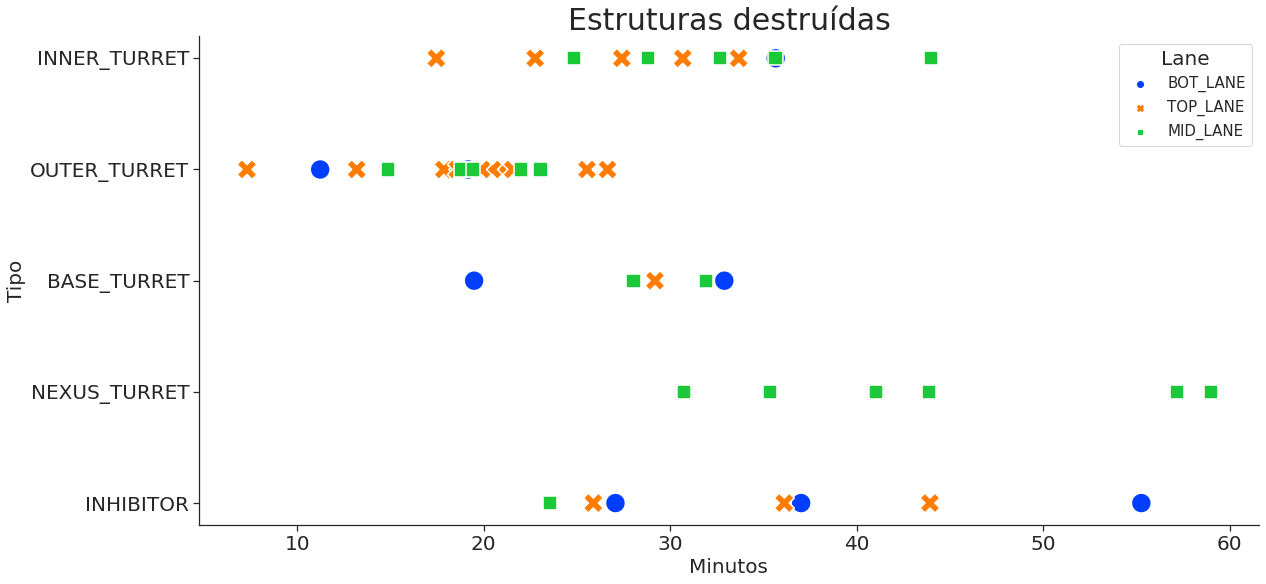

In [52]:
jogos = Torres.sample(n=50, random_state=1)
jogo1 = Torres.loc[Torres['IdJogo'] == 0]
jogo1.sort_values(ascending=True, by = 'Time')
ax = sns.scatterplot(data = jogos, x = 'Time', y = 'Type', style = "Lane", hue = "Lane", s = 400, palette = 'bright')
plt.legend( bbox_to_anchor = (1.02, 1), loc='upper left', prop = {'size': 15}, borderaxespad=0)
ax.figure.set_size_inches(19, 9)
ax.set_title('Estruturas destruídas', fontsize = 30)
ax.set_xlabel('Minutos', fontsize = 20)
ax.set_ylabel('Tipo', fontsize = 20)
ax.tick_params(labelsize = 20)
ax.legend(title='Lane', title_fontsize = 20, fontsize = 15)


#### 2.5.8 Concentração de Abates por tempo de jogo

Qual lane deve ser mais precionada no inicio do jogo? como deve ser posicionado o time durante o jogo?

In [53]:
amostraEarlykills = EarlyKill.sample(n=1000, random_state=1)
amostraMidkills = MidKill.sample(n=1000, random_state=1)
amostraLatekills = LateKill.sample(n=1000, random_state=1)

In [54]:
kmeans_df = KMeans(n_clusters=2)
kmeans_df.fit(amostraEarlykills[['x_pos','y_pos']])

KMeans(n_clusters=2)

Text(14000, 500, 'rio')

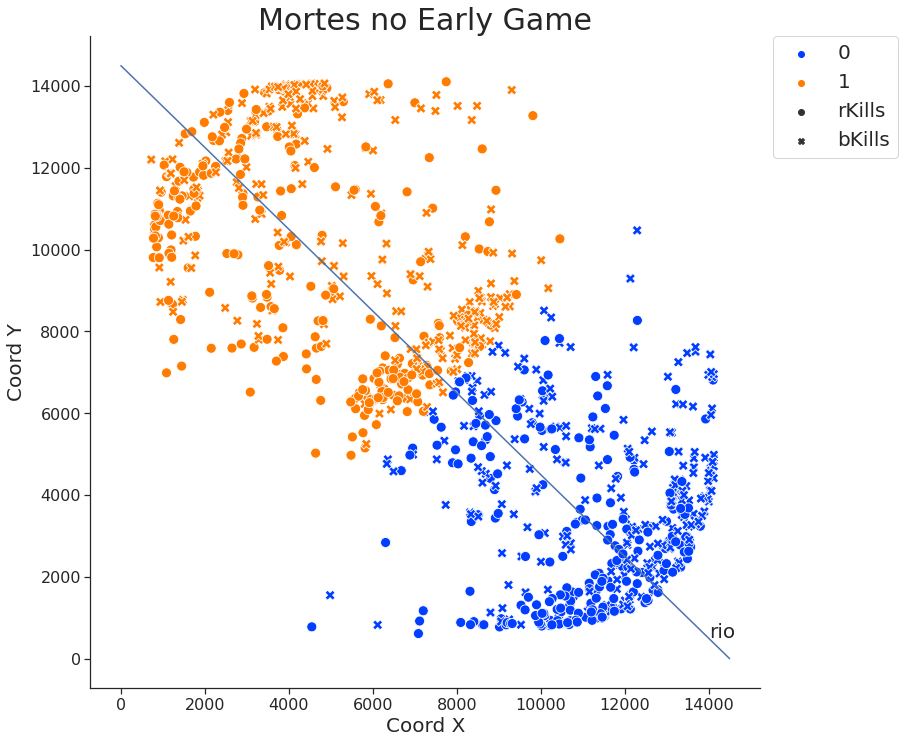

In [55]:
ax = sns.scatterplot(data=amostraEarlykills, y = 'y_pos', x = 'x_pos', hue=kmeans_df.labels_, palette = 'bright', style = 'Team', s=100)
ax.figure.set_size_inches(12, 12)
ax.set_title('Mortes no Early Game', fontsize = 30)
ax.set_xlabel('Coord X', fontsize = 20)
ax.set_ylabel('Coord Y', fontsize = 20)
ax.tick_params(labelsize = 10, axis='x')
plt.legend( bbox_to_anchor = (1.02, 1), loc='upper left', prop = {'size': 20}, borderaxespad=0)

# ------ linha vertical
xdata = list(range(0,14500))
ydata = list(range(14500,0,-1))
plt.plot(xdata, ydata)
ax.tick_params(labelsize = 16)
ax.annotate('rio', xy=(14000,500), fontsize=20)

É Notorio no grafio acima a maior concentração de abates na região inferior. Um dos Metas(objetivos criado entre a comunidadde) mais antigos e que perdura até hoje é de deixar o ADC forte, como ele localiza-se na parte inferior, conseguimos notar que a maior concentração de abatar é na região inferior, criando pressão no bot no inicio do jogo.

In [56]:
kmeans_df = KMeans(n_clusters=2)
kmeans_df.fit(amostraMidkills[['x_pos','y_pos']])

KMeans(n_clusters=2)

Text(14000, 500, 'rio')

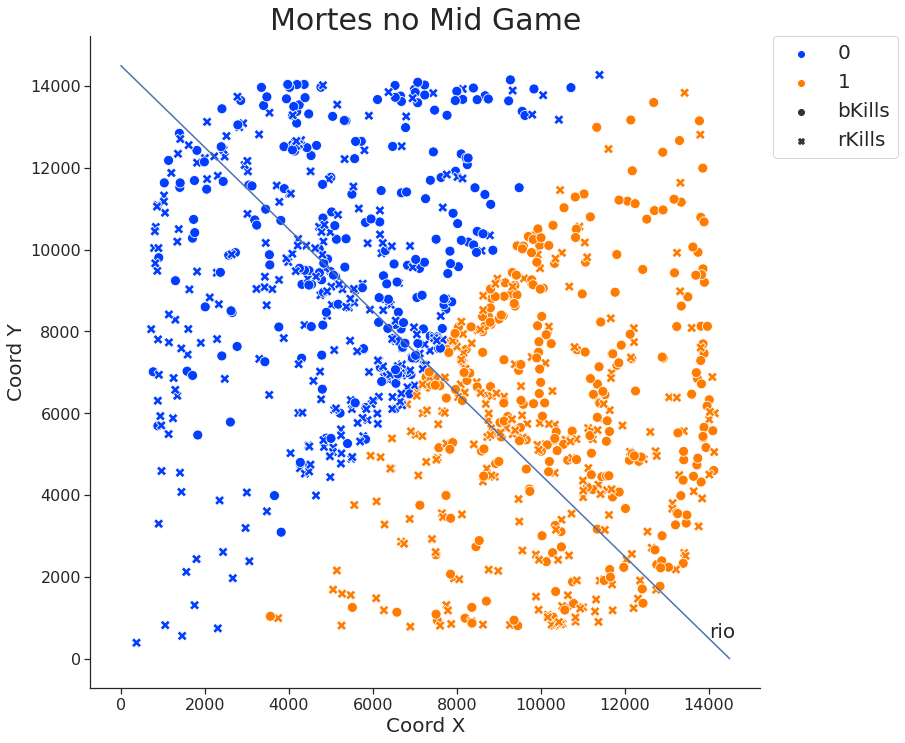

In [57]:
ax = sns.scatterplot(data=amostraMidkills, y = 'y_pos', x = 'x_pos', hue = kmeans_df.labels_, palette = 'bright', style = 'Team', s=100)
ax.figure.set_size_inches(12, 12)
ax.set_title('Mortes no Mid Game', fontsize = 30)
ax.set_xlabel('Coord X', fontsize = 20)
ax.set_ylabel('Coord Y', fontsize = 20)
ax.tick_params(labelsize = 10, axis='x')
plt.legend( bbox_to_anchor = (1.02, 1), loc='upper left', prop = {'size': 20}, borderaxespad=0)

# ------ linha vertical
xdata = list(range(0,14500))
ydata = list(range(14500,0,-1))
plt.plot(xdata, ydata)
ax.tick_params(labelsize = 16)
ax.annotate('rio', xy=(14000,500), fontsize=20)


Já no Mid Game temous uma divisão de abates na região central do jogo, visto que os times agoras se organizam no mapa para levar os objetivos e garantir presença de mapa

In [58]:
kmeans_df = KMeans(n_clusters=2)
kmeans_df.fit(amostraLatekills[['x_pos','y_pos']])

KMeans(n_clusters=2)

Text(14000, 500, 'rio')

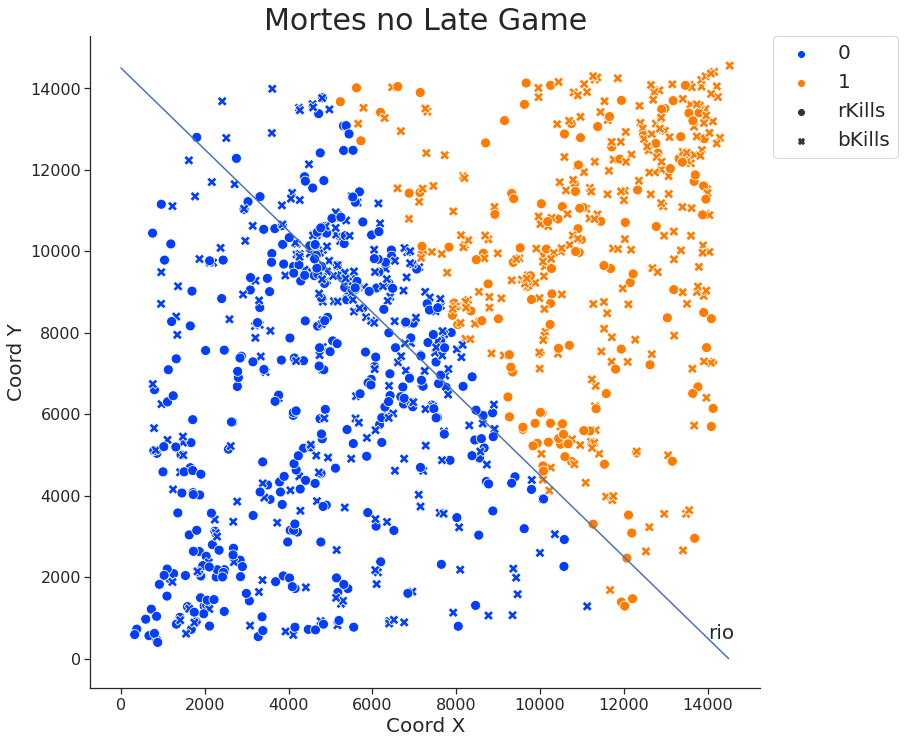

In [59]:
ax = sns.scatterplot(data=amostraLatekills, y = 'y_pos', x = 'x_pos', hue=kmeans_df.labels_, palette = 'bright', style = 'Team', s=100)
ax.figure.set_size_inches(12, 12)
ax.set_title('Mortes no Late Game', fontsize = 30)
ax.set_xlabel('Coord X', fontsize = 20)
ax.set_ylabel('Coord Y', fontsize = 20)
ax.tick_params(labelsize = 10, axis='x')
plt.legend( bbox_to_anchor = (1.02, 1), loc='upper left', prop = {'size': 20}, borderaxespad=0)

# ------ linha vertical
xdata = list(range(0,14500))
ydata = list(range(14500,0,-1))
plt.plot(xdata, ydata)
ax.tick_params(labelsize = 16)
ax.annotate('rio', xy=(14000,500), fontsize=20)


No final do Jogo, a divisão muda de eixo, nota-se que isso ocorre pois agora o objetivo dos times é levas as extremidades(Nexus) do time inimigo. Os objetivos nesse momento já estão feitos, basta agora levar as torres inimigas.

# 3. Conclusão:

Cada partida de LoL é unica, porem todas possuem suas semelhanças sem perder suas peculiaridades. Entender isto torna-se crucial para o desenvolvimento de estratégias confiaveis e coesas. Ao fim deste trabalho compreende-se como as partidas se organizam, quais são os elementos mais decisivos e quais estrategias basicas tomar.

Na fase de rotas, ou seja, no _Early Game_, surge a necessidade de controlar suas rotas, criar pressão no bot e evitar confrontos desnecessarios. Já na fase de rotação, _Mid Game_, começa-se a realizar objetivos, garantir objetivos podem sem cruciais para a vitoria, não somente, como começar a avançar as lanes inimigas e criar controle no mapa. Por fim, no final de jogo, _Late Game_, mostra-se necessario realizar o _push_ (empurar as lanes) e garantir abertura de mapa, quanto mais tempo demorar nessa fase mais complicado será de levar, visto que os minons ficam mais fortes e o tempo de ressureição demora mais.

Por fim, para analises futuras, desejo realizar novas pesquisas, com o intuito de entender melhor as nuancias das jogadas, compreender quais campeões possuem mais sirnegias, quais melhores campeões e em quais rotas. Trazer outros datasets sobre os jogos mais casuais. Realizar previsão de vitoria pelos campeões selecionados, rotas escolhidas, inimigos enfrentados e objetivos gerados. Descobri qual a melhor lane de ser levada, ou qual a ordem de derrubada de torres.







